# `TARGET PROJECT`

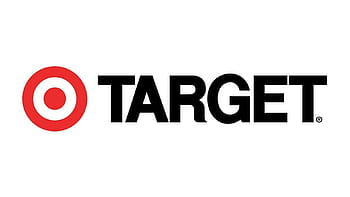

In [1]:
import pandas as pd 
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from pymysql import connect
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

## Context:

Target is a globally renowned brand and a prominent retailer in the United States. Target makes itself a preferred shopping destination by offering outstanding value, inspiration, innovation and an exceptional guest experience that no other retailer can deliver.

This particular business case focuses on the operations of Target in Brazil and provides insightful information about 100,000 orders placed between 2016 and 2018. The dataset offers a comprehensive view of various dimensions including the order status, price, payment and freight performance, customer location, product attributes, and customer reviews.

By analyzing this extensive dataset, it becomes possible to gain valuable insights into Target's operations in Brazil. The information can shed light on various aspects of the business, such as order processing, pricing strategies, payment and shipping efficiency, customer demographics, product characteristics, and customer satisfaction levels.

___________________________________________________________________________________________________________

The data is available in 8 csv files:

customers.csv

sellers.csv

order_items.csv

geolocation.csv

payments.csv

reviews.csv

orders.csv

products.csv
___________________________________________________________________________________________________________

The column description for these csv files is given below.

** A. The customers.csv contain following features:**

- customer_id- ID of the consumer who made the purchase

- customer_unique_id- Unique ID of the consumer

- customer_zip_code_prefix- Zip Code of consumer’s location

- customer_city- Name of the City from where order is made

- customer_state- State Code from where order is made (Eg. são paulo - SP)

**B. The sellers.csv contains following features:**

- seller_id- Unique ID of the seller registered

- seller_zip_code_prefix- Zip Code of the seller’s location

- seller_city- Name of the City of the seller

- seller_state- State Code (Eg. são paulo - SP)

**C. The order_items.csv contain following features:**

- order_id- A Unique ID of order made by the consumers

- order_item_id- A Unique ID given to each item ordered in the order

- product_id- A Unique ID given to each product available on the site

- seller_id- Unique ID of the seller registered in Target

- shipping_limit_date- The date before which the ordered product must be shipped

- price- Actual price of the products ordered

- freight_value- Price rate at which a product is delivered from one point to another

**D. The geolocations.csv contain following features:**

- geolocation_zip_code_prefix- First 5 digits of Zip Code

- geolocation_lat- Latitude

- geolocation_lng- Longitude

- geolocation_city- City

- geolocation_state- State

**E. The payments.csv contain following features:**

- order_id- A Unique ID of order made by the consumers

- payment_sequential- Sequences of the payments made in case of EMI

- payment_type- Mode of payment used (Eg. Credit Card)

- payment_installments- Number of installments in case of EMI purchase

- payment_value- Total amount paid for the purchase order

**F. The orders.csv contain following features:**

- order_id- A Unique ID of order made by the consumers

- customer_id- ID of the consumer who made the purchase

- order_status- Status of the order made i.e. delivered, shipped, etc.

- order_purchase_timestamp- Timestamp of the purchase

- order_delivered_carrier_date- Delivery date at which carrier made the delivery

- order_delivered_customer_date- Date at which customer got the product

- order_estimated_delivery_date- Estimated delivery date of the products

**G. The reviews.csv contain following features:**

- review_id- ID of the review given on the product ordered by the order id

- order_id- A Unique ID of order made by the consumers

- review_score- Review score given by the customer for each order on a scale of 1-5

- review_comment_title- Title of the review

- review_comment_message- Review comments posted by the consumer for each order

- review_creation_date- Timestamp of the review when it is created

- review_answer_timestamp- Timestamp of the review answered

**H. The products.csv contain following features:**

- product_id- A Unique identifier for the proposed project.

- product_category_name- Name of the product category

- product_name_lenght- Length of the string which specifies the name given to the products ordered

- product_description_lenght- Length of the description written for each product ordered on the site

- product_photos_qty- Number of photos of each product ordered available on the shopping portal

- product_weight_g- Weight of the products ordered in grams

- product_length_cm- Length of the products ordered in centimeters

- product_height_cm- Height of the products ordered in centimeters

- product_width_cm- Width of the product ordered in centimeters



In [2]:
data_base = connect(host='localhost',user='root',password='noohinaaz96')
cur = data_base.cursor()
query = 'show databases'
cur.execute(query)
data_bases = cur.fetchall()
for data in data_bases:
    print(data)

('employees',)
('farmers_market',)
('information_schema',)
('medal',)
('murder',)
('mysql',)
('performance_schema',)
('sakila',)
('target',)


In [3]:
data_base = connect(host='localhost',user='root',password='noohinaaz96',database = 'target')
cur = data_base.cursor()
query = 'show tables'
cur.execute(query)
tables = cur.fetchall()
print(tables)

(('customers',), ('geolocation',), ('order_items',), ('order_reviews',), ('orders',), ('payments',), ('products',), ('sellers',))


## `Exploratory Data Analysis Of The Datasets`

In [4]:
query1 = "SHOW COLUMNS FROM customers"
query2 = "SHOW COLUMNS FROM geolocation "
query3 = "SHOW COLUMNS FROM order_items"
query4 = "SHOW COLUMNS FROM order_reviews "
query5 = "SHOW COLUMNS FROM payments"
query6 = "SHOW COLUMNS FROM orders"
query7 = "SHOW COLUMNS FROM products"
query8 = "SHOW COLUMNS FROM sellers"
cur.execute(query1)
cur.execute(query2)
cur.execute(query3)
cur.execute(query4)
cur.execute(query5)
cur.execute(query6)
cur.execute(query7)
cur.execute(query8)
col1 = pd.read_sql_query(query1,data_base)
col2 = pd.read_sql_query(query2,data_base)
col3 = pd.read_sql_query(query3,data_base)
col4 = pd.read_sql_query(query4,data_base)
col5 = pd.read_sql_query(query5,data_base)
col6 = pd.read_sql_query(query6,data_base)
col7 = pd.read_sql_query(query7,data_base)
col8 = pd.read_sql_query(query8,data_base)
data_types = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8], ignore_index=True, axis=0)
data_types

Field         Type Null  Key Default Extra
0                     customer_id  varchar(50)   NO  PRI    None      
1              customer_unique_id  varchar(50)  YES         None      
2        customer_zip_code_prefix          int  YES         None      
3                   customer_city  varchar(50)  YES         None      
4                  customer_state  varchar(10)  YES         None      
5     geolocation_zip_code_prefix       bigint  YES         None      
6                 geolocation_lat       double  YES         None      
7                 geolocation_lng       double  YES         None      
8                geolocation_city         text  YES         None      
9               geolocation_state         text  YES         None      
10                       order_id  varchar(50)   NO         None      
11                  order_item_id          int  YES         None      
12                     product_id  varchar(50)  YES         None      
13                      seller_id  varchar(50)  YES         None      
14            shipping_limit_date     datetime  YES         None      
15                          price       double  YES         None      
16                  freight_value       double  YES         None      
17                      review_id         text  YES         None      
18                       order_id         text  YES         None      
19           review_creation_date     datetime  YES         None      
20        review_answer_timestamp     datetime  YES         None      
21                   review_score       double  YES         None      
22           review_comment_title         text  YES         None      
23                       order_id  varchar(50)  YES         None      
24             payment_sequential          int  YES         None      
25                   payment_type  varchar(20)  YES         None      
26           payment_installments          int  YES         None      
27                  payment_value       double  YES         None      
28                       order_id  varchar(50)   NO  PRI    None      
29                    customer_id  varchar(50)  YES         None      
30                   order_status  varchar(20)  YES         None      
31       order_purchase_timestamp     datetime  YES         None      
32              order_approved_at     datetime  YES         None      
33   order_delivered_carrier_date     datetime  YES         None      
34  order_delivered_customer_date     datetime  YES         None      
35  order_estimated_delivery_date     datetime  YES         None      
36                     product_id  varchar(50)   NO  PRI    None      
37               product_category  varchar(50)  YES         None      
38            product_name_length          int  YES         None      
39     product_description_length          int  YES         None      
40             product_photos_qty          int  YES         None      
41               product_weight_g          int  YES         None      
42              product_length_cm          int  YES         None      
43              product_height_cm          int  YES         None      
44               product_width_cm          int  YES         None      
45                      seller_id         text  YES         None      
46         seller_zip_code_prefix       bigint  YES         None      
47                    seller_city         text  YES         None      
48                   seller_state         text  YES         None

In [5]:
# time range between the orders were placed
query1 = """select min(order_purchase_timestamp) as 'start time', 
max(order_purchase_timestamp) as 'end time',
max(year(order_purchase_timestamp)) - min(year(order_purchase_timestamp)) as 'time period'
from target.orders """
cur.execute(query1)
time= pd.read_sql_query(query1,data_base)
time

start time            end time  time period
0 2016-09-04 21:15:19 2018-10-17 17:30:18            2

In [6]:
# Count the Cities & States of customers who ordered during the given period.
query2 = """select count(distinct(customer_city)) as 'total cities',
count(distinct(customer_state)) as 'total states',
count(distinct(customer_unique_id)) as 'total_unique_customers',
count(distinct(customer_zip_code_prefix)) as 'total_unique_zipcodes'
from target.customers """
cur.execute(query2)
city_state= pd.read_sql_query(query2,data_base)
city_state

total cities  total states  total_unique_customers  total_unique_zipcodes
0          4119            27                   96096                  14994

In [7]:
# Count the Cities & States of customers who ordered during the given period.
query3 = """select count(distinct(order_id)),
count(distinct(customer_id)),
count(distinct(order_status))
from target.orders"""
cur.execute(query3)
city_state= pd.read_sql_query(query3,data_base)
city_state

count(distinct(order_id))  count(distinct(customer_id))  \
0                      99441                         99441   

   count(distinct(order_status))  
0                              8

In [8]:
query3 = """select count(distinct(order_id)) as 'total orders',
count(distinct(product_id)) as 'total product ids',
count(distinct(seller_id)) as 'total sellers',
sum(price+freight_value) as 'total revenue',
avg(price) as 'average_price',
avg(freight_value) as 'average_freight'
from target.order_items"""
cur.execute(query3)
city_state= pd.read_sql_query(query3,data_base)
city_state

total orders  total product ids  total sellers  total revenue  \
0         98666              32951           3095   1.584355e+07   

   average_price  average_freight  
0     120.653739         19.99032

In [9]:
query31 = """select count(distinct(seller_id)),
count(distinct(seller_city)),
count(distinct(seller_state))
from target.sellers"""
cur.execute(query31)
seller_info= pd.read_sql_query(query31,data_base)
seller_info

count(distinct(seller_id))  count(distinct(seller_city))  \
0                        3095                           610   

   count(distinct(seller_state))  
0                             23

In [10]:
query4 = """select review_score, 
count(review_score) as frequency 
from target.order_reviews 
group by review_score 
order by 1 """
cur.execute(query4)
score= pd.read_sql_query(query4,data_base)
score

review_score  frequency
0           1.0      11424
1           2.0       3151
2           3.0       8179
3           4.0      19142
4           5.0      57328

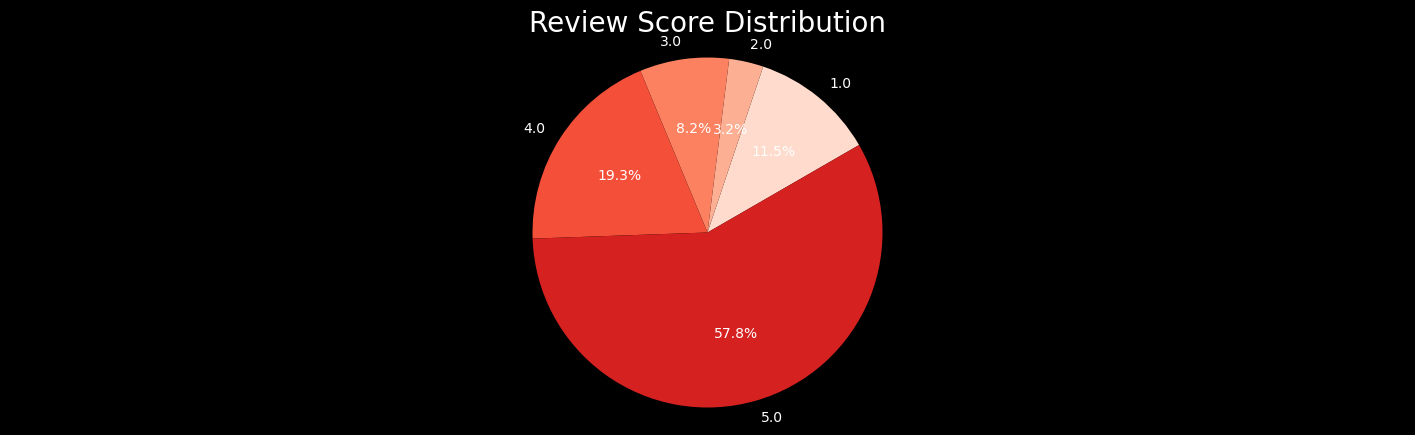

In [11]:
plt.figure(figsize=(18,5))
plt.pie(score['frequency'],labels=score['review_score'],autopct="%1.1f%%",startangle=30,colors=sns.color_palette('Reds'))
plt.title('Review Score Distribution',fontsize=20)
plt.axis('equal')
plt.show()

In [12]:
query5 = """select payment_type, 
count(payment_type) as 'total counts' 
from target.payments 
group by payment_type """
cur.execute(query5)
payment_type= pd.read_sql_query(query5,data_base)
payment_type

payment_type  total counts
0  credit_card         76795
1          UPI         19784
2      voucher          5775
3   debit_card          1529
4  not_defined             3

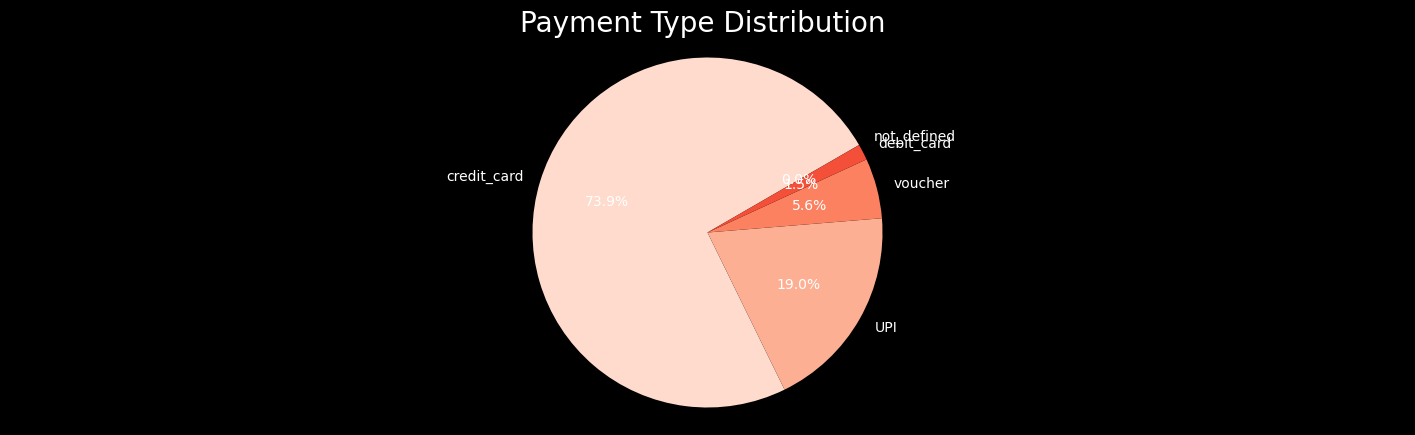

In [13]:
plt.figure(figsize=(18,5))
plt.pie(payment_type['total counts'],labels=payment_type['payment_type'],autopct="%1.1f%%",startangle=30,colors=sns.color_palette('Reds'))
plt.title('Payment Type Distribution ',fontsize=20)
plt.axis('equal')
plt.show()

In [14]:
query6 = """select product_category, 
count(product_category) as frequency
from target.products 
group by product_category
order by 2 desc 
"""
cur.execute(query6)
famous_products= pd.read_sql_query(query6,data_base)
famous_products.head()

product_category  frequency
0        bed table bath       3029
1         sport leisure       2867
2  Furniture Decoration       2657
3         HEALTH BEAUTY       2444
4            housewares       2335

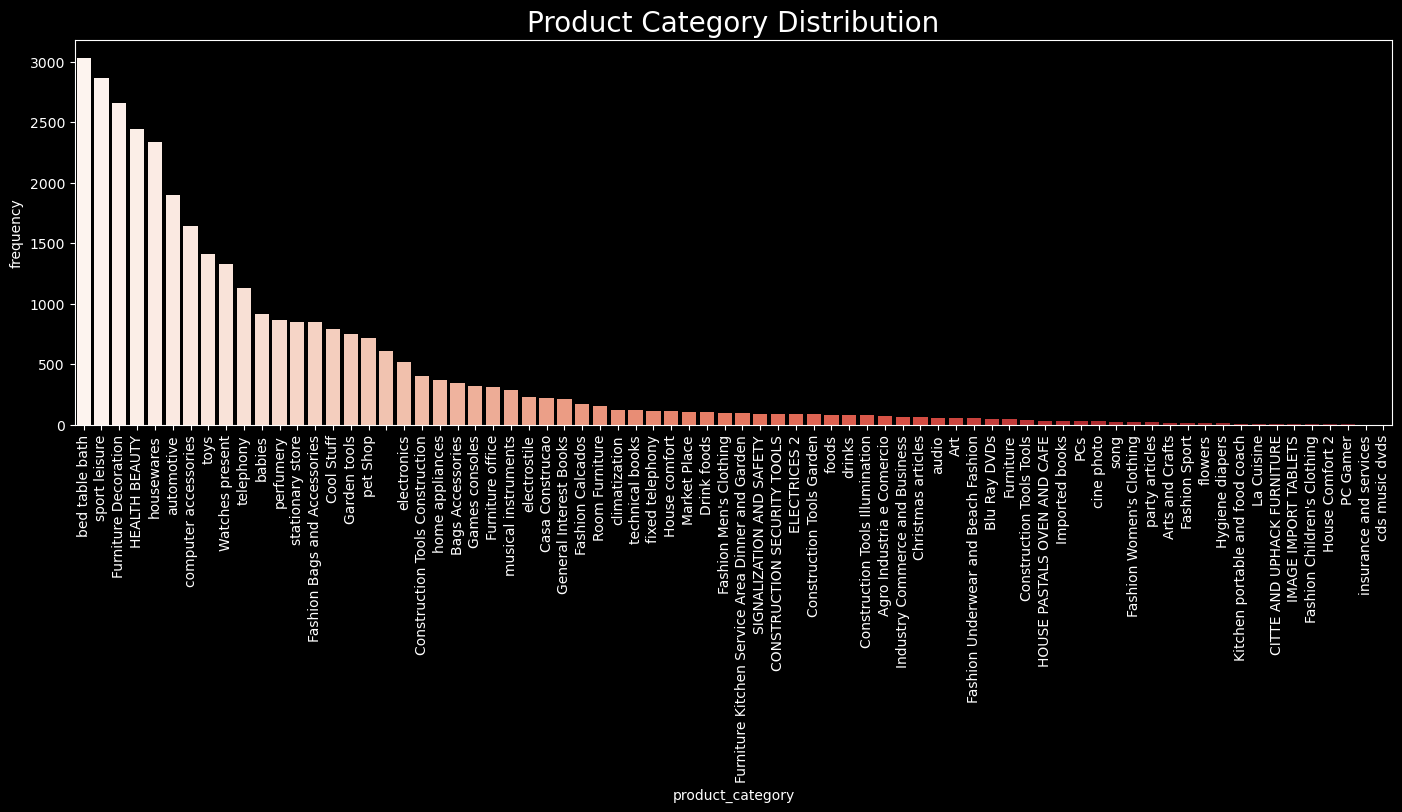

In [15]:
plt.figure(figsize=(17,5))
sns.barplot(x=famous_products['product_category'],y=famous_products['frequency'],palette='Reds')
plt.xticks(rotation=90)
plt.title('Product Category Distribution',fontsize=20)
plt.show()

In [16]:
query71 = """select seller_state,
count(seller_state) as counts
from target.sellers
group by 1
order by 2 desc """
cur.execute(query71)
sellers_info = pd.read_sql_query(query71,data_base)

query72 = """select customer_state,
count(customer_state) as counts
from target.customers
group by 1
order by 2 desc """
cur.execute(query72)
customer_info = pd.read_sql_query(query72,data_base)


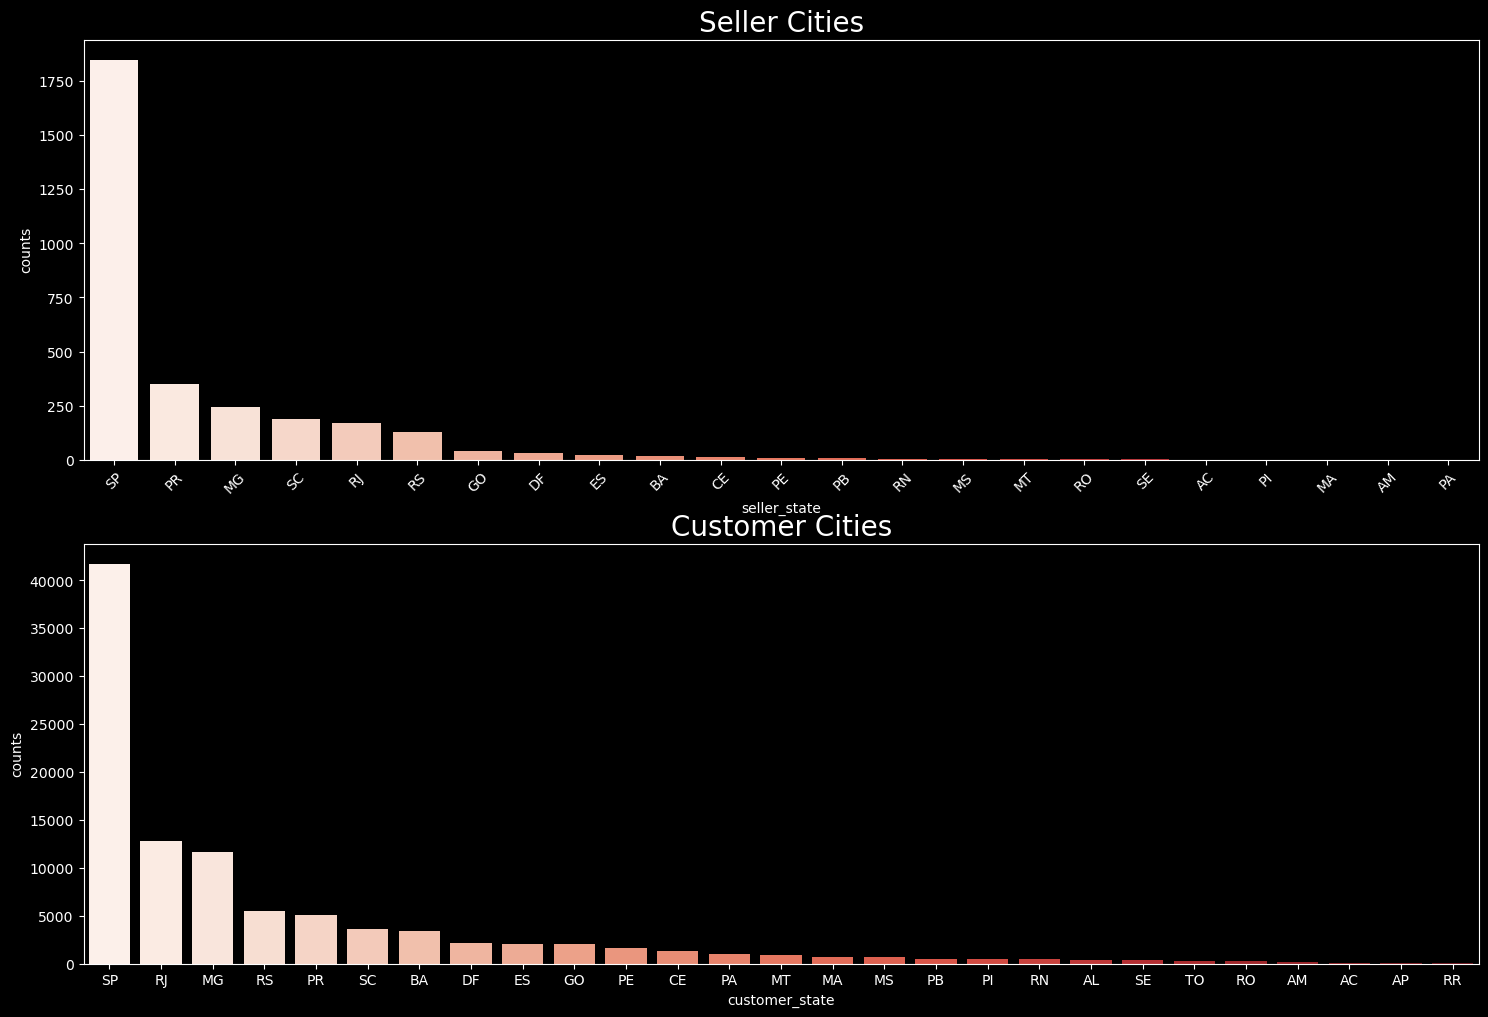

In [17]:
plt.figure(figsize =(18,12))
plt.subplot(2,1,1)
sns.barplot(x=sellers_info['seller_state'], y=sellers_info['counts'],palette='Reds')
plt.title('Seller Cities',fontsize=20)
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x=customer_info['customer_state'], y=customer_info['counts'],palette='Reds')
plt.title('Customer Cities',fontsize=20)
plt.show()

### `INSIGHTS:`

**a.** SP has the highest counts for both customers (41,746) and sellers (1,849), indicating it is a key hub for both buying and selling activities.
Customer-Seller Distribution Imbalance:

**b.** RJ (Rio de Janeiro) is second for customers (12,852) but has significantly fewer sellers (171), highlighting a potential opportunity to increase seller presence in this state.
Balanced Presence:

**c.** MG (Minas Gerais) shows a balanced presence with high customer (11,635) and seller (244) counts, suggesting a stable market.

In [18]:
query8 = """select YEAR(order_purchase_timestamp) as 'year',
count(order_id) as 'total orders'
from target.orders
group by year 
order by 1"""
cur.execute(query8)
year_data = pd.read_sql_query(query8,data_base)
year_data

year  total orders
0  2016           329
1  2017         45101
2  2018         54011

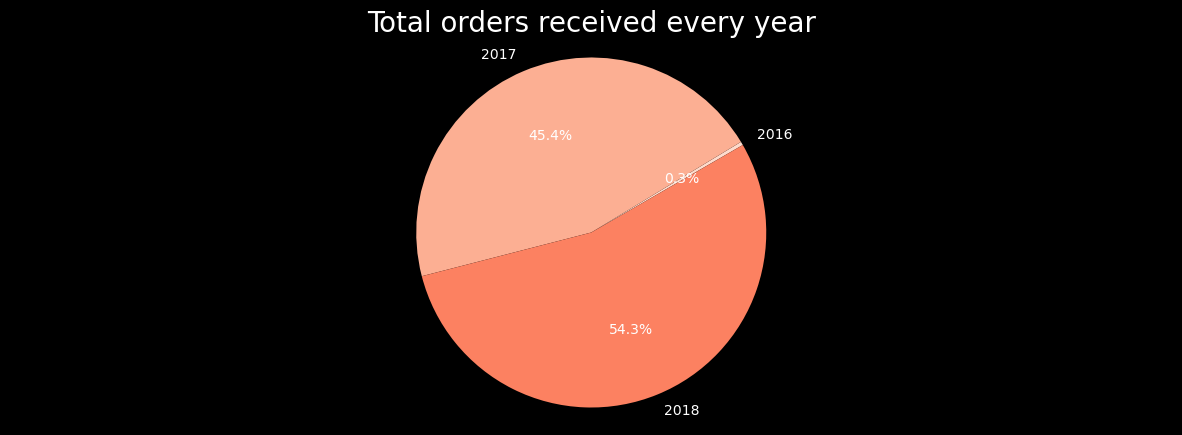

In [19]:
plt.figure(figsize =(15,5))
# sns.barplot(x=year_data['year'], y= year_data['percentage_change'],palette='magma')
plt.pie(year_data['total orders'],labels=year_data['year'],autopct="%1.1f%%",startangle=30,colors=sns.color_palette('Reds'))
plt.title('Total orders received every year',fontsize=20)
plt.axis('equal')
plt.show()

### `INSIGHTS:`

- Since the 2016 data only includes the last few months, it comprises just 0.03% of the dataset.
- Although the 2018 data only extends through August, it makes up more than 54% of the dataset.

In [20]:
query08 = """ select order_status, count(*) as 'counts'
from target.orders
group by 1
"""
cur.execute(query08)
status = pd.read_sql_query(query08, data_base)
status

order_status  counts
0    delivered   96478
1  unavailable     609
2      shipped    1107
3     canceled     625
4     invoiced     314
5   processing     301
6     approved       2
7      created       5

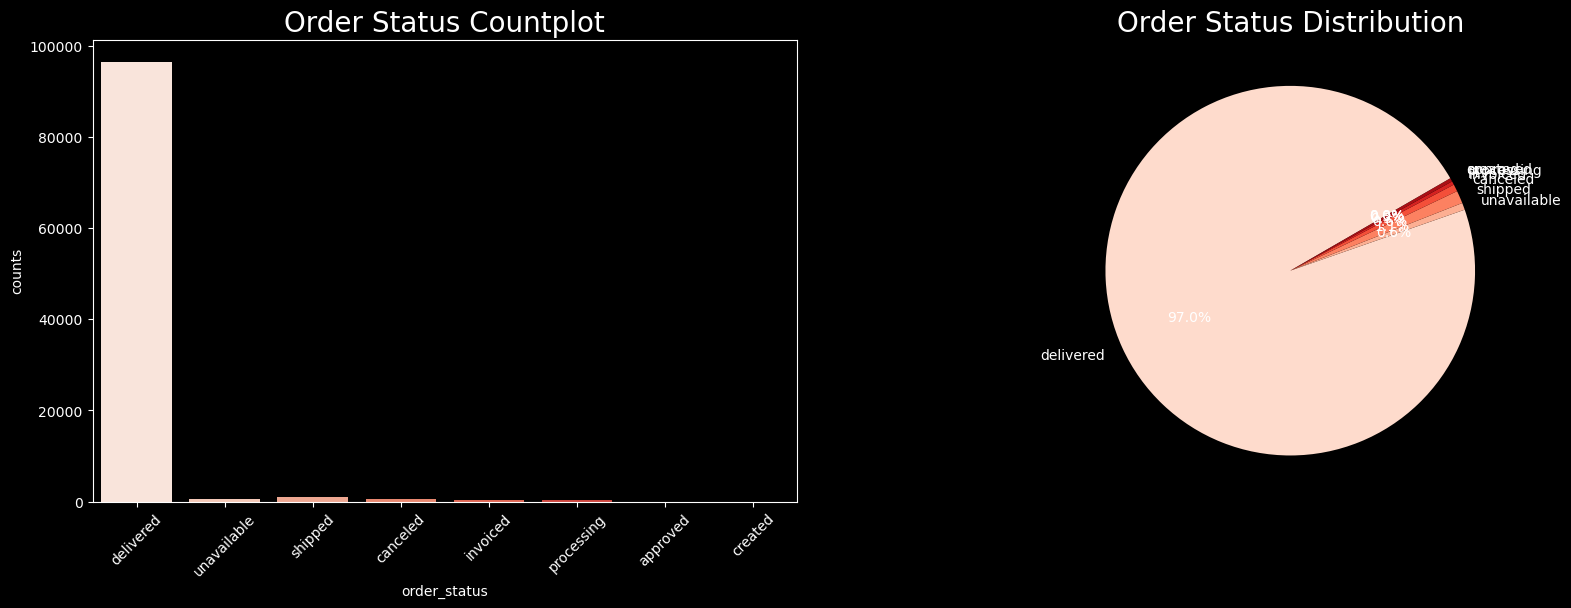

In [21]:
plt.figure(figsize =(20,6))
plt.subplot(1,2,1)
sns.barplot(x=status['order_status'], y=status['counts'],palette='Reds')
plt.xticks(rotation=45)
plt.title('Order Status Countplot',fontsize=20)
plt.subplot(1,2,2)
plt.pie(status['counts'],labels=status['order_status'],autopct="%1.1f%%",startangle=30,colors=sns.color_palette('Reds'))
plt.title('Order Status Distribution',fontsize=20)
plt.show()

### `INSIGHTS:`

- High success rate with 96,478 delivered orders.
- Initial stages like created (5) and approved (2) are rarely used, suggesting fast progression.
- Improvement needed in managing unavailable (609) and canceled (625) orders.
- Shipped orders (1,107) are in transit and require timely monitoring.
- Invoiced (314) and processing (301) stages are quick, but ensuring timely updates is crucial.

In [22]:
query30 = """select price,
freight_value
from target.order_items"""
cur.execute(query30)
revenue_data = pd.read_sql_query(query30,data_base)
revenue_data.head()

price  freight_value
0   58.90          13.29
1  239.90          19.93
2  199.00          17.87
3   12.99          12.79
4  199.90          18.14

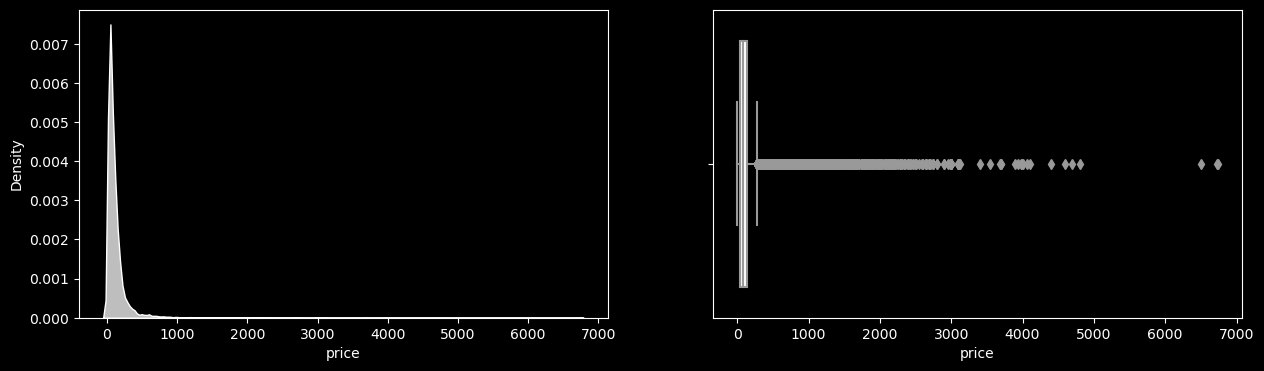

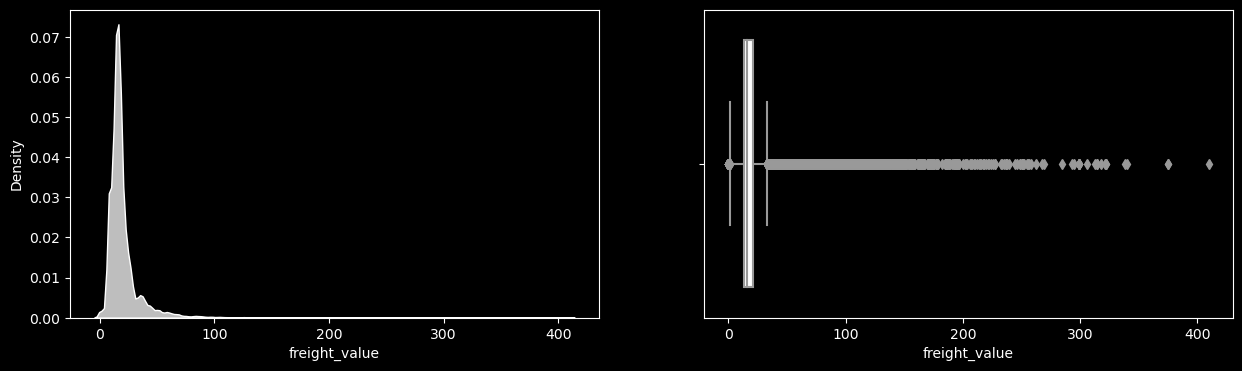

In [23]:
for i in revenue_data.columns:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.kdeplot(x=revenue_data[i],color='white',multiple='stack')
    plt.subplot(1,2,2)
    sns.boxplot(x=revenue_data[i],color='white')
    plt.show()

In [24]:
revenue_data.describe()

price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000

### `INSIGHTS:`

- High variability in prices, as indicated by a large standard deviation compared to the mean, suggests a mix of low-cost and high-end products.
- The mean price is notably higher than the median price, indicating the presence of several high-priced outliers.
- The freight value also shows variability, but not as pronounced as the prices, indicating more consistency in shipping costs.
- The minimum freight value being zero suggests some products have free shipping or included shipping in the product price.
- The variation in freight values relative to prices may indicate differing logistics strategies. 

# `DATA ANALYSIS:`
## `ORDERS AND REVENUE FLOW IN THE BUSINESS`

In [25]:
query9 = """SELECT YEAR(order_purchase_timestamp) AS 'year',
       MONTH(order_purchase_timestamp) AS 'month',
       WEEK(order_purchase_timestamp) AS 'week',
       COUNT(order_id) as'total_orders',
        SUM(COUNT(order_id)) OVER (
        PARTITION BY YEAR(order_purchase_timestamp)
        ORDER BY YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp)
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS rolling_total_orders
FROM target.orders
WHERE  YEAR(order_purchase_timestamp) >2016 and order_status = 'delivered' and MONTH(order_purchase_timestamp) between 1 and 8
GROUP BY YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp), WEEK(order_purchase_timestamp)
ORDER BY YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp), WEEK(order_purchase_timestamp)"""
cur.execute(query9)
month_data = pd.read_sql_query(query9,data_base)
month_data.head()

year  month  week  total_orders  rolling_total_orders
0  2017      1     1            40                 184.0
1  2017      1     2            63                 420.0
2  2017      1     3           173                 357.0
3  2017      1     4           330                 750.0
4  2017      1     5           144                 144.0

<Figure size 1500x1200 with 0 Axes>

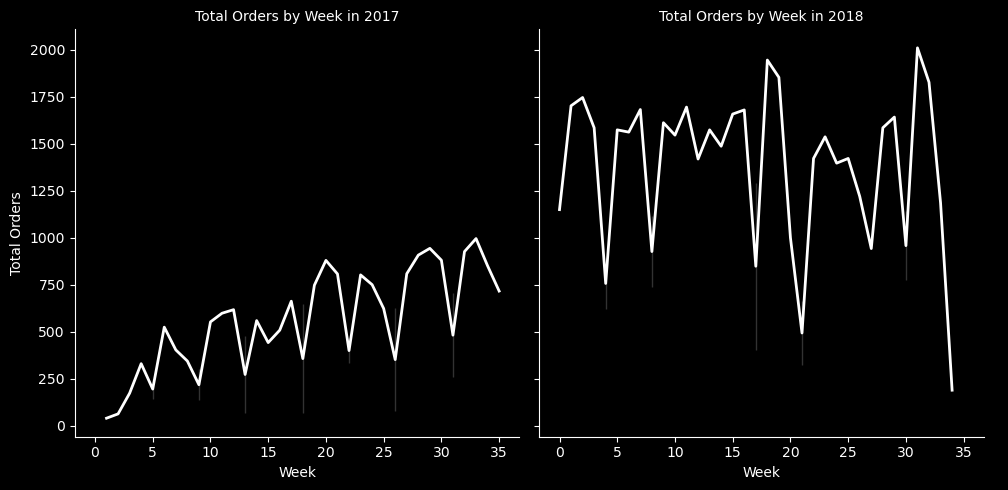

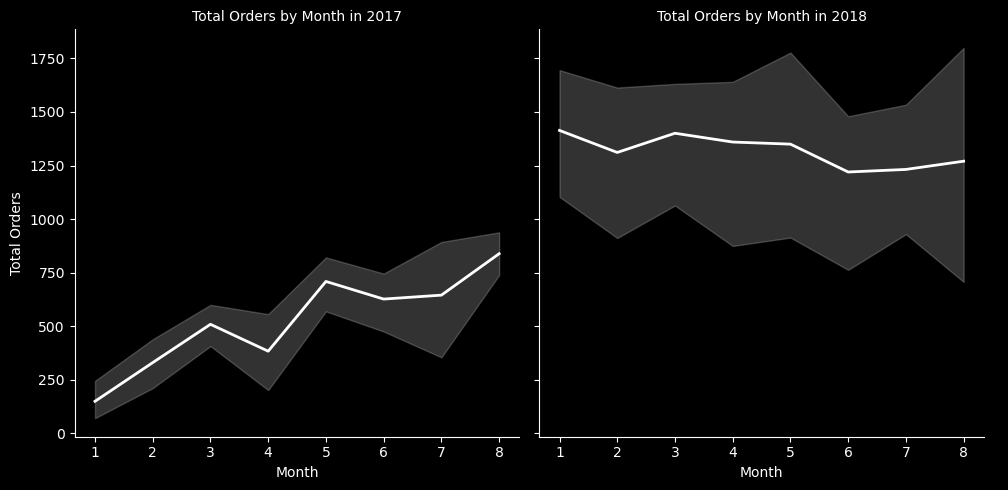

In [26]:
month_data['time_period'] = month_data['year'].astype(str) + '-' + month_data['month'].astype(str)
plt.figure(figsize=(15,12))
# FacetGrid for total orders by week
g1 = sns.FacetGrid(month_data, col='year', col_wrap=2, height=5)
g1.map(sns.lineplot, 'week', 'total_orders', linewidth=2, color='white')
g1.add_legend()
g1.set_axis_labels('Week', 'Total Orders')
g1.set_titles('Total Orders by Week in {col_name}')

# FacetGrid for total orders by month
g2 = sns.FacetGrid(month_data, col='year', col_wrap=2, height=5)
g2.map(sns.lineplot, 'month', 'total_orders', linewidth=2, color='white')
g2.add_legend()
g2.set_axis_labels('Month', 'Total Orders')
g2.set_titles('Total Orders by Month in {col_name}')
plt.show()

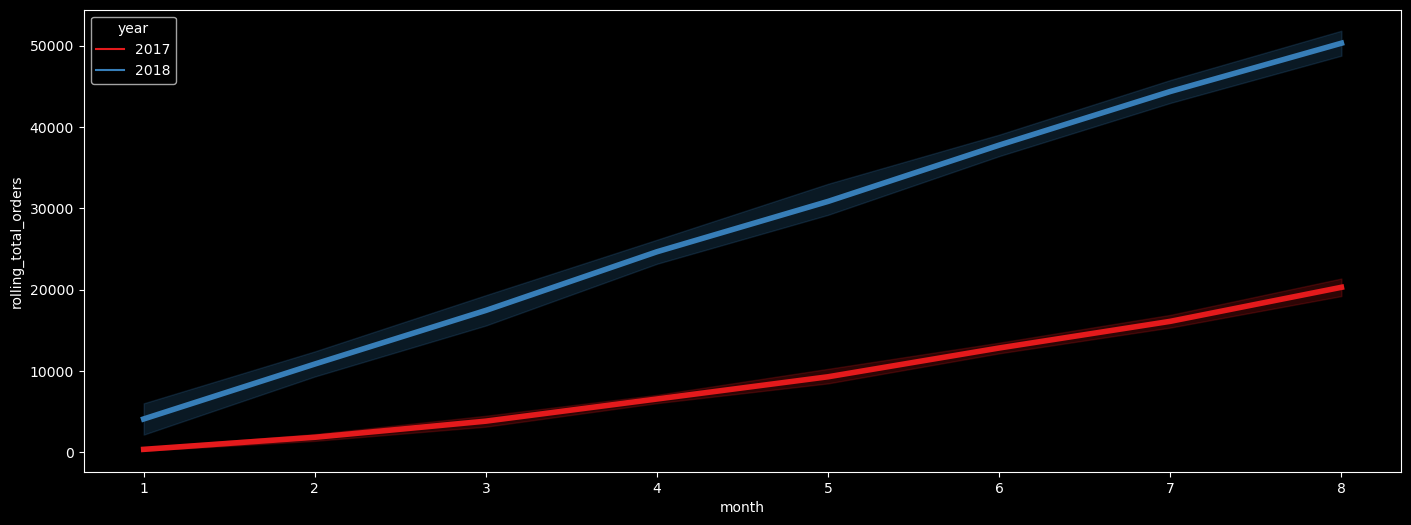

In [27]:
plt.figure(figsize=(17,6))
sns.lineplot(x=month_data['month'], y=month_data['rolling_total_orders'],hue=month_data['year'],linewidth=4,palette='Set1')
plt.show()

### `INSIGHTS:`

**weeks**

_**2017**_

- A general upward trend is observed throughout the year, with a significant peak around week 25 and a slight decline towards the end.
- A noticeable seasonal pattern emerges, with higher order volumes during certain weeks. This could be attributed to factors like festive seasons or promotional activities.
- The week-over-week variations in order volume are relatively smaller in 2017, indicating a more stable demand pattern.


_**2018**_
- The order volume exhibits greater volatility compared to 2017. There are multiple peaks and troughs, suggesting fluctuations in demand throughout the year.
- The presence of seasonal patterns is less pronounced in 2018 compared to 2017.
- Significant fluctuations are observed in 2018, suggesting that demand was influenced by various factors, potentially including external events or marketing campaigns.

**Month:**

- In 2017, a steady increase in orders from January to May, peaking in May, followed by a gradual decline until August.
- In 2018, a similar pattern to 2017, but with a more pronounced peak in May and a steeper decline thereafter.
- During both the years, a drop of order numbers can be noticed from March to April.
- 

**Comparison** 
- 2018 generally has higher order volumes compared to 2017.
- 2018 demonstrates a faster growth rate in total orders.
- The data for 2017 seems more reliable due to narrower confidence intervals.

**Rolling Orders**
- The rolling total orders consistently increase over time for both years, but the overall volume is higher in 2018.
- The growth rate is more rapid in 2018 compared to 2017.
- The data for 2017 appears to be more reliable due to narrower confidence intervals.

In [97]:
query118 ="""select c.customer_state,
avg(oi.price+oi.freight_value) as'average_revenue',
sum(oi.price+oi.freight_value) as'total_revenue',
count(o.order_id) as 'total_orders'
from target.customers as c
JOIN target.orders as o
ON o.customer_id = c.customer_id
JOIN order_items as oi
ON o.order_id = oi.order_id
GROUP BY 1
ORDER BY 3
"""
cur.execute(query118)
state_order_revenue = pd.read_sql_query(query118,data_base)

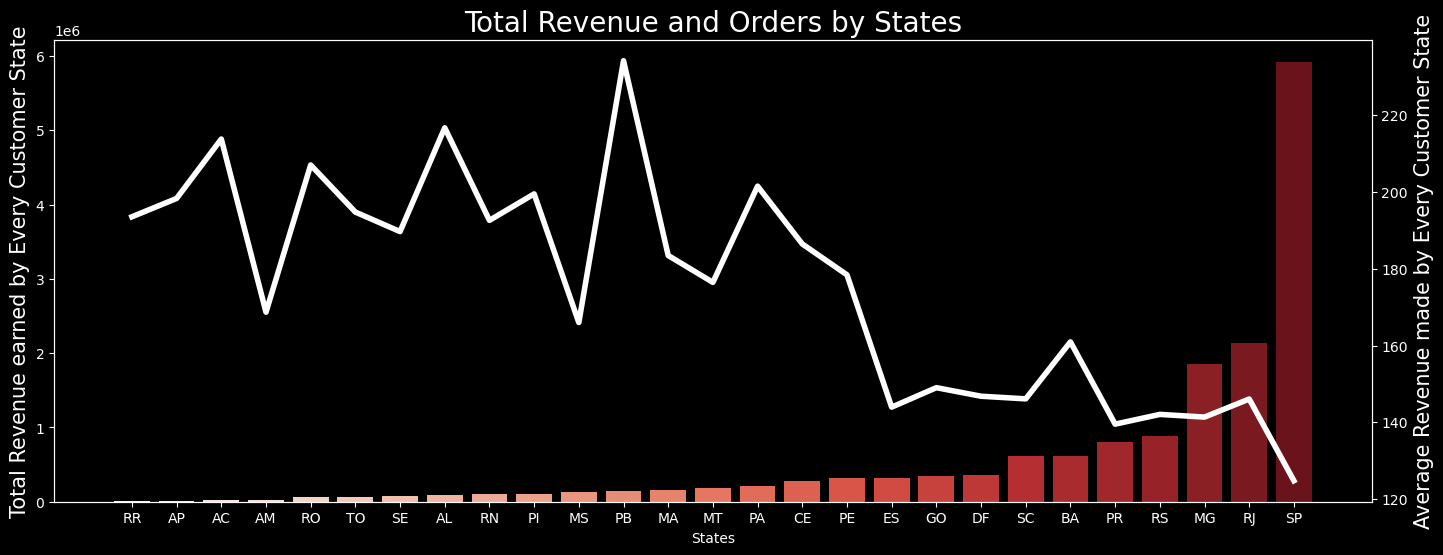

In [96]:
plt.figure(figsize=(17,6))
ax1 = sns.barplot(x=state_order_revenue ['customer_state'],y=state_order_revenue ['total_revenue'],linewidth=4,palette='Reds')
ax1.set_ylabel('Total Revenue earned by Every Customer State', color='white',fontsize=15)
ax1.tick_params(axis='y', labelcolor='white')

# Create a second y-axis for the lineplot
ax2 = ax1.twinx()
sns.lineplot(x=state_order_revenue ['customer_state'],y=state_order_revenue ['average_revenue'],linewidth=4,color='white')
ax2.set_ylabel('Average Revenue made by Every Customer State', color='white',fontsize=15)
ax2.tick_params(axis='y', labelcolor='white')

# Set title and labels
ax1.set_xlabel('States')
ax1.set_title('Total Revenue and Orders by States',fontsize=20)
plt.show()

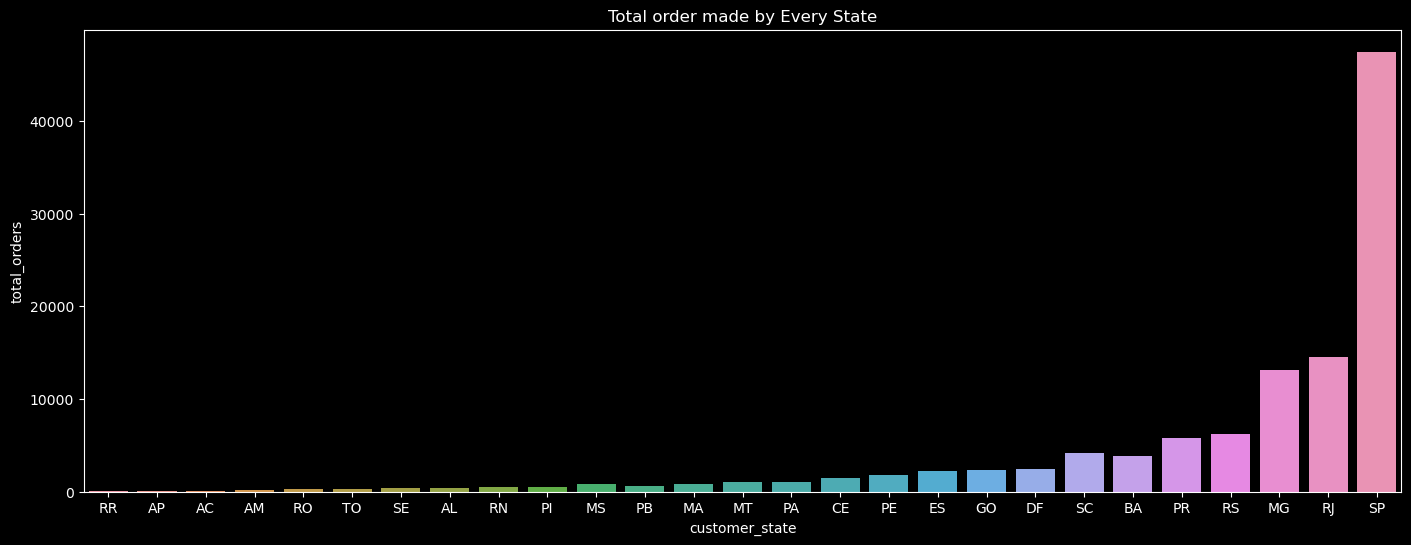

In [101]:
plt.figure(figsize=(17,6))
sns.barplot(x=state_order_revenue['customer_state'],y=state_order_revenue['total_orders'])
plt.title('Total order made by Every State')
plt.show()

### `INSIGHTS:`

- States like SP and RJ show that a larger number of transactions can result in very high total revenue even with lower average revenue. This could indicate a large customer base or high volume of lower-priced transactions.
- States such as RR and PR have high average revenue but lower total revenue, suggesting fewer, high-value transactions.
- States with the highest total revenue (SP, RJ) have substantial revenue concentration, implying that a few states contribute a large portion of the total revenue. 

In [108]:
query10 = """SELECT 
    c.customer_state,
    YEAR(o.order_purchase_timestamp) AS year,
    MONTH (o.order_purchase_timestamp) AS month,
    COUNT(o.order_id) AS total_orders,
    SUM(COUNT(o.order_id)) OVER (
        PARTITION BY c.customer_state
        ORDER BY YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS rolling_total_orders
FROM 
    customers AS c
INNER JOIN 
    orders AS o 
ON 
    c.customer_id = o.customer_id 
WHERE 
    YEAR(o.order_purchase_timestamp) = 2017 AND MONTH(o.order_purchase_timestamp) BETWEEN 1 AND 8
GROUP BY 
    c.customer_state, YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
ORDER BY 
    c.customer_state, year, month;
"""
cur.execute(query10)
state_order1 = pd.read_sql_query(query10,data_base)
state_order1.head(24)

customer_state  year  month  total_orders  rolling_total_orders
0              AC  2017      1             2                   2.0
1              AC  2017      2             3                   5.0
2              AC  2017      3             2                   7.0
3              AC  2017      4             5                  12.0
4              AC  2017      5             8                  20.0
5              AC  2017      6             4                  24.0
6              AC  2017      7             5                  29.0
7              AC  2017      8             4                  33.0
8              AL  2017      1             2                   2.0
9              AL  2017      2            12                  14.0
10             AL  2017      3            10                  24.0
11             AL  2017      4            23                  47.0
12             AL  2017      5            27                  74.0
13             AL  2017      6            10                  84.0
14             AL  2017      7            17                 101.0
15             AL  2017      8            18                 119.0
16             AM  2017      2             8                   8.0
17             AM  2017      3             5                  13.0
18             AM  2017      4            13                  26.0
19             AM  2017      5            10                  36.0
20             AM  2017      6             1                  37.0
21             AM  2017      7             5                  42.0
22             AM  2017      8             5                  47.0
23             AP  2017      2             2                   2.0

In [109]:
state_order1.groupby(['customer_state'])['total_orders'].describe()

count         mean         std    min     25%     50%  \
customer_state                                                          
AC                8.0     4.125000    1.959410    2.0    2.75     4.0   
AL                8.0    14.875000    8.007809    2.0   10.00    14.5   
AM                7.0     6.714286    3.946065    1.0    5.00     5.0   
AP                6.0     2.666667    1.366260    1.0    2.00     2.5   
BA                8.0   101.750000   45.615630   25.0   83.00    99.5   
CE                8.0    41.000000   22.759613    9.0   24.25    45.0   
DF                8.0    53.375000   26.516504   13.0   32.25    60.5   
ES                8.0    61.500000   30.733881   12.0   43.00    64.0   
GO                8.0    59.375000   28.605382   18.0   37.50    65.0   
MA                8.0    25.000000   11.988089    9.0   15.50    25.5   
MG                8.0   339.125000  121.073104  108.0  271.00   360.5   
MS                8.0    19.000000    9.486833    1.0   14.00    22.0   
MT                8.0    26.125000   10.802612   11.0   16.75    26.0   
PA                8.0    35.125000   13.527089   12.0   32.50    36.0   
PB                8.0    16.750000    7.535630    2.0   15.00    17.0   
PE                8.0    48.375000   25.966668    9.0   35.25    45.5   
PI                8.0    15.750000    5.994045    7.0   12.75    13.5   
PR                8.0   154.125000   56.625177   65.0  117.00   148.5   
RJ                8.0   389.625000  160.136493   97.0  317.00   403.5   
RN                8.0    14.125000    7.059694    5.0    9.50    13.0   
RO                8.0    10.375000    3.852179    3.0    9.00    10.5   
RR                6.0     2.000000    0.632456    1.0    2.00     2.0   
RS                8.0   178.250000   80.521071   54.0  130.50   179.5   
SC                8.0   111.250000   46.842441   31.0   93.50   113.0   
SE                8.0    13.500000    6.480741    4.0   10.50    12.5   
SP                8.0  1120.000000  491.488119  299.0  844.50  1170.5   
TO                8.0     9.125000    6.104741    1.0    5.75     8.0   

                    75%     max  
customer_state                   
AC                 5.00     8.0  
AL                19.25    27.0  
AM                 9.00    13.0  
AP                 3.00     5.0  
BA               134.00   158.0  
CE                55.25    73.0  
DF                71.75    87.0  
ES                85.75    95.0  
GO                81.00    93.0  
MA                34.50    40.0  
MG               434.25   469.0  
MS                25.50    29.0  
MT                37.25    38.0  
PA                38.25    60.0  
PB                20.75    27.0  
PE                69.25    85.0  
PI                20.50    25.0  
PR               205.50   223.0  
RJ               506.50   571.0  
RN                17.75    27.0  
RO                11.75    16.0  
RR                 2.00     3.0  
RS               228.00   299.0  
SC               153.50   159.0  
SE                15.50    25.0  
SP              1469.75  1729.0  
TO                14.25    18.0

### `INSIGHTS:`

- SP's revenue distribution is more stable despite its high mean, indicated by a relatively low standard deviation to mean ratio.
- RJ and MG’s revenue spread shows RJ's revenue values are more tightly clustered around the mean compared to MG.
- BA's relatively lower mean but higher maximum value suggests sporadic high revenue transactions.
- SC's higher standard deviation compared to similar states like BA indicates a wider range of revenue values.
- The lower standard deviation in ES and GO suggests more consistent revenue transactions compared to other states with similar means.
- PE's relatively high mean and moderate standard deviation suggest more frequent higher revenue transactions than other similar states.
- PA’s mean is slightly higher than MT’s despite having a lower maximum value, indicating fewer extreme high-revenue transactions.
- The revenue distribution in AL is more dispersed than in SE, despite their close mean values.
- TO's low standard deviation relative to its mean implies very consistent revenue transactions.
- AP's high standard deviation compared to its low mean and median suggests occasional higher revenue outliers.

In [110]:
fig = px.line(state_order1, 
              x='month', 
              y='total_orders', 
              color='customer_state', 
              title='Total by Month and State in the year 2017', 
              labels={'month': 'Month', 'total_orders': 'Total Orders'},
              color_discrete_sequence=px.colors.qualitative.Set1)

# Update the figure layout
fig.update_layout(
    width=900, 
    height=500,
    legend_title_text='Customer State',
    xaxis_title='Month',
    yaxis_title='Total Orders'
)

# Show the plot
fig.show()

In [111]:
query11 = """SELECT 
    c.customer_state,
    YEAR(o.order_purchase_timestamp) AS year,
    MONTH (o.order_purchase_timestamp) AS month,
    COUNT(o.order_id) AS total_orders,
    SUM(COUNT(o.order_id)) OVER (
        PARTITION BY c.customer_state
        ORDER BY YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS rolling_total_orders
FROM 
    customers AS c
INNER JOIN 
    orders AS o 
ON 
    c.customer_id = o.customer_id 
WHERE 
    YEAR(o.order_purchase_timestamp) = 2018 AND o.order_status = 'delivered'
GROUP BY 
    c.customer_state, YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
ORDER BY 
    c.customer_state, year, month;
"""
cur.execute(query11)
state_order2 = pd.read_sql_query(query11,data_base)
state_order2.head()

customer_state  year  month  total_orders  rolling_total_orders
0             AC  2018      1             6                   6.0
1             AC  2018      2             3                   9.0
2             AC  2018      3             2                  11.0
3             AC  2018      4             4                  15.0
4             AC  2018      5             2                  17.0

In [113]:
fig = px.line(state_order2, 
              x='month', 
              y='total_orders', 
              color='customer_state', 
              title='Total Orders by Month and State in the year 2018', 
              labels={'month': 'Month', 'total_orders': 'Total Orders'},
              color_discrete_sequence=px.colors.qualitative.Set1)

# Update the figure layout
fig.update_layout(
    width=900, 
    height=500,
    legend_title_text='Customer State',
    xaxis_title='Month',
    yaxis_title='Total Orders'
)

# Show the plot
fig.show()

In [32]:
query13 = """SELECT 
    c.customer_state,
    YEAR(o.order_purchase_timestamp) AS year,
    MONTH (o.order_purchase_timestamp) AS month,
    SUM(p.payment_value) AS total_orders,
    SUM(SUM(p.payment_value)) OVER (
        PARTITION BY c.customer_state
        ORDER BY YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS rolling_total_revenue
FROM 
    customers AS c
INNER JOIN 
    orders AS o 
ON 
    c.customer_id = o.customer_id 
INNER JOIN
    payments as p
ON o.order_id = p.payment_value
WHERE 
    MONTH(o.order_purchase_timestamp) BETWEEN 1 & 8 AND o.order_status = 'delivered'
GROUP BY 
    c.customer_state, YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
ORDER BY 
    c.customer_state, year, month;
"""
cur.execute(query13)
state_revenue = pd.read_sql_query(query13,data_base)
state_revenue.head()

customer_state  year  month  total_orders  rolling_total_revenue
0             AC  2017      1           0.0                    0.0
1             AC  2017      2           0.0                    0.0
2             AC  2017      3           9.0                    9.0
3             AC  2017      4        1432.0                 1441.0
4             AC  2017      5        2347.0                 3788.0

In [33]:
query12 = """SELECT
  CASE
    WHEN HOUR(order_purchase_timestamp) BETWEEN 0 AND 6 THEN 'Dawn'
    WHEN HOUR(order_purchase_timestamp) BETWEEN 7 AND 12 THEN 'Morning'  
    WHEN HOUR(order_purchase_timestamp) BETWEEN 13 AND 18 THEN 'Afternoon'
    ELSE 'Night'
  END AS order_period,
  COUNT(*) AS order_count, 
  YEAR(order_purchase_timestamp) AS year,  
  MONTH(order_purchase_timestamp) AS month  
FROM target.orders
GROUP BY 
  order_period,  -- Group by order_period
  YEAR(order_purchase_timestamp),
  MONTH(order_purchase_timestamp)
  ORDER BY YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp), order_period
"""
cur.execute(query12)
hour_data = pd.read_sql_query(query12,data_base)
hour_data.head()

order_period  order_count  year  month
0    Afternoon            1  2016      9
1         Dawn            1  2016      9
2      Morning            1  2016      9
3        Night            1  2016      9
4    Afternoon          116  2016     10

In [34]:
hour_data.groupby(['order_period'])['order_count'].sum()

order_period
Afternoon    38135
Dawn          5242
Morning      27733
Night        28331
Name: order_count, dtype: int64

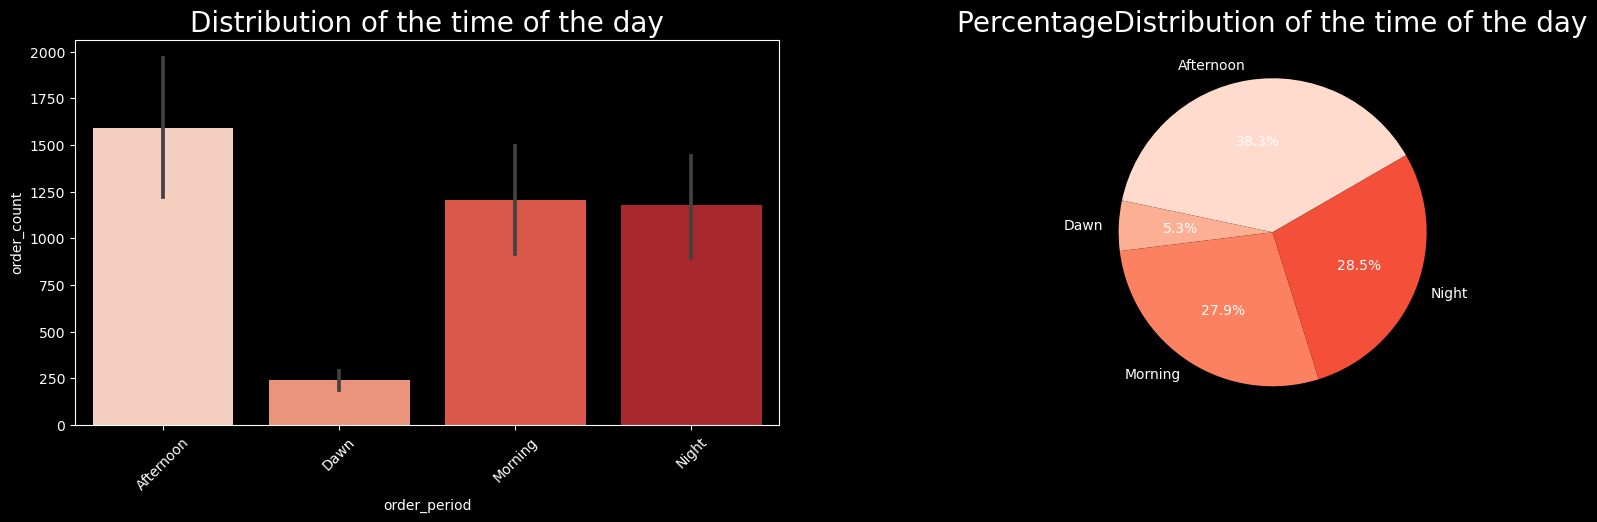

In [35]:
plt.figure(figsize =(20,5))
plt.subplot(1,2,1)
sns.barplot(x=hour_data['order_period'],y=hour_data['order_count'],palette='Reds')
plt.title('Distribution of the time of the day',fontsize=20)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
hour_data_aggregated = hour_data.groupby(['order_period'])['order_count'].sum()
plt.pie(hour_data_aggregated, labels=hour_data_aggregated.index, autopct="%1.1f%%", startangle=30, colors=sns.color_palette('Reds'))
plt.title('PercentageDistribution of the time of the day',fontsize=20)
plt.show()

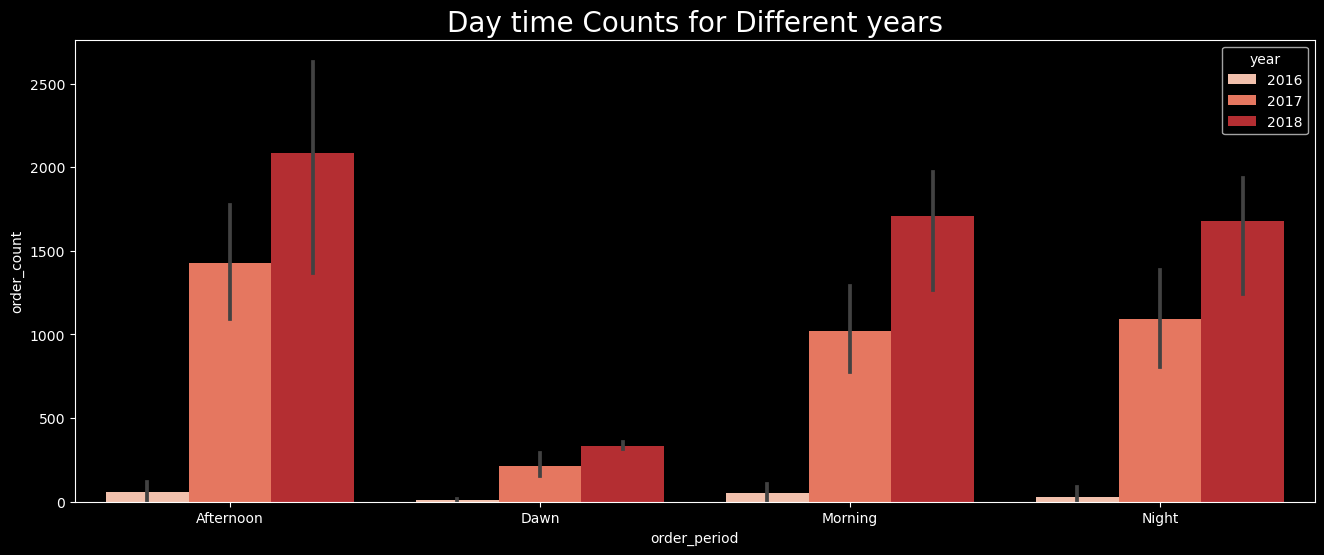

In [36]:
plt.figure(figsize=(16,6))
sns.barplot(y=hour_data['order_count'],x=hour_data['order_period'],hue=hour_data['year'],linewidth=3,palette='Reds')
plt.title('Day time Counts for Different years',fontsize=20)
plt.show()

In [37]:
fig = px.sunburst(hour_data, 
                  path=['year', 'month', 'order_period'], 
                  values='order_count', 
                  title='Orders Distribution by Time of Day, Year, and Month',
                  color='order_period',
                  color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

### `INSIGHTS:`
   
- Morning and Dawn consistently have the lowest order counts across both years.
- Morning performs better than Dawn, with higher order counts in both years.
- Afternoon consistently has the highest order counts across both years, peaking in November 2017 and January 2018..
- Night is the second most active period, with significant peaks in November 2017 (2280 orders) and January 2018 (2064 orders).
- A trend of number of order_period is followed that is 2016 is less than 2017 and 2017 is less than 2018.

**2017:**

- Notable upward trend from mid-year, peaking in November and December.
- High order counts in April, May, and August.
- Steady rise in orders from mid-year to end-year.
- November and December show dramatic increases, likely due to holiday shopping.

**2018:**

- High order counts at the beginning of the year, particularly in January and March.
- Orders decline significantly after August, with a sharp drop in September and October.
- Strong start with high order volumes in early months, particularly January and March.
- Significant decline in orders post-August, suggesting potential data issues or external factors affecting sales.

In [38]:
query23 = """WITH CTE1 AS (
    SELECT 
        YEAR(order_purchase_timestamp) AS year,
        MONTH(order_purchase_timestamp) AS month,
        COUNT(*) AS total_orders
    FROM target.orders
    WHERE order_status = 'delivered' and YEAR(order_purchase_timestamp) > 2016
    GROUP BY YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp)
),
CTE2 AS (
    SELECT 
        year,
        month,
        total_orders,
        LAG(total_orders) OVER (ORDER BY year, month) AS lagged_total_orders
    FROM CTE1
)
SELECT 
    CONCAT(year, '-', LPAD(month, 2, '0')) AS period,
    total_orders,
    lagged_total_orders,
    ROUND((total_orders - lagged_total_orders) / NULLIF(lagged_total_orders, 0) * 100, 2) AS growth_percentage
FROM CTE2
ORDER BY year, month

"""
cur.execute(query23)
product_data = pd.read_sql_query(query23,data_base)
product_data 

period  total_orders  lagged_total_orders  growth_percentage
0   2017-01           750                  NaN                NaN
1   2017-02          1653                750.0             120.40
2   2017-03          2546               1653.0              54.02
3   2017-04          2303               2546.0              -9.54
4   2017-05          3546               2303.0              53.97
5   2017-06          3135               3546.0             -11.59
6   2017-07          3872               3135.0              23.51
7   2017-08          4193               3872.0               8.29
8   2017-09          4150               4193.0              -1.03
9   2017-10          4478               4150.0               7.90
10  2017-11          7289               4478.0              62.77
11  2017-12          5513               7289.0             -24.37
12  2018-01          7069               5513.0              28.22
13  2018-02          6555               7069.0              -7.27
14  2018-03          7003               6555.0               6.83
15  2018-04          6798               7003.0              -2.93
16  2018-05          6749               6798.0              -0.72
17  2018-06          6099               6749.0              -9.63
18  2018-07          6159               6099.0               0.98
19  2018-08          6351               6159.0               3.12

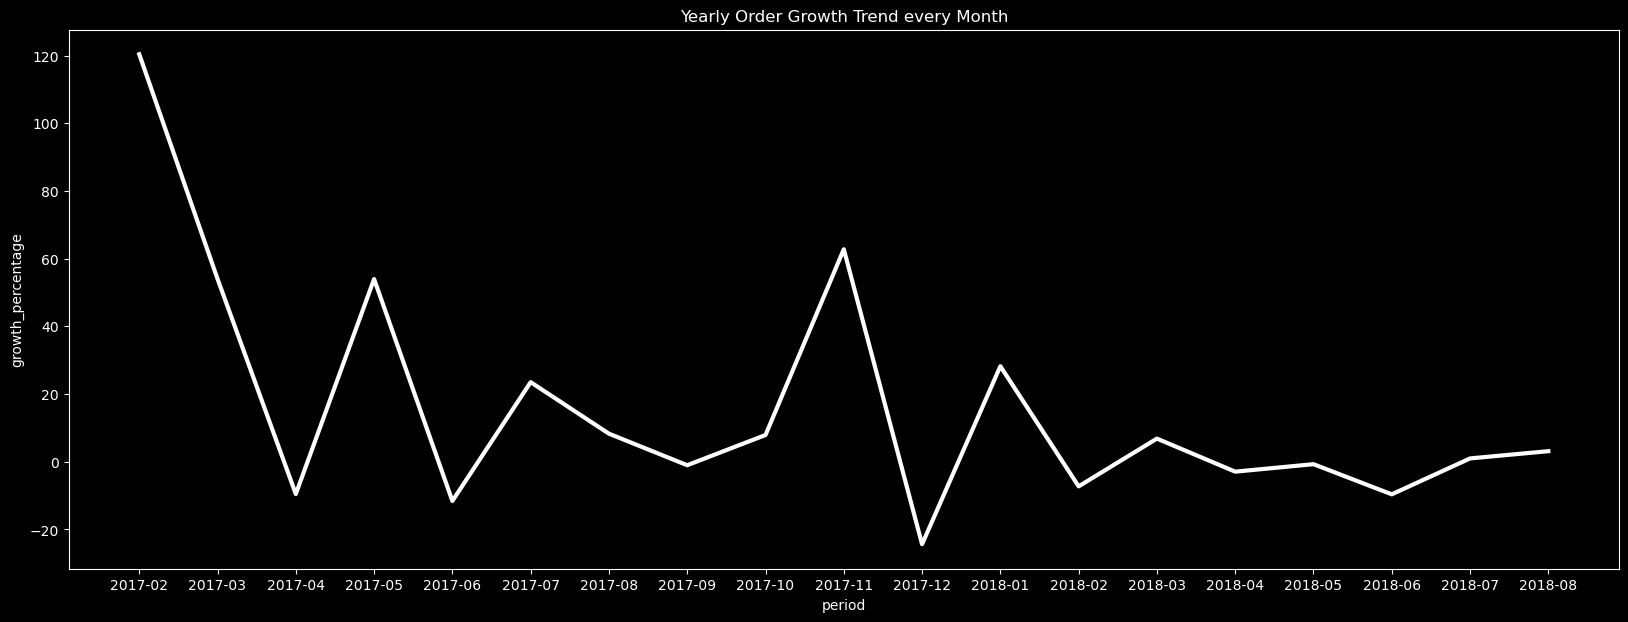

In [39]:
plt.figure(figsize=(20,7))
sns.lineplot(x=product_data ['period'], y=product_data['growth_percentage'], linewidth=3, color='white')
plt.title('Yearly Order Growth Trend every Month')
plt.show()

### `INSIGHTS:`

- In both years, January starts strong with notable growth, particularly in January 2018 after a December decline. February often shows high growth, especially in 2017. April and June typically experience declines following peaks in March and May. November features significant growth in 2017, with a subsequent sharp drop in December, while November 2018 shows stable growth. Overall, the data reveals strong early-year growth, mid-year declines, and variable end-of-year performance, suggesting seasonal or cyclical trends affecting orders.
- Both years exhibit a consistent pattern with strong early-year growth in January and February. Mid-year declines are noticeable around June and July, followed by a drop in December. Each year shows recovery after significant declines, with a rebound in the early months of the next year. These patterns indicate seasonal trends and cyclical fluctuations in order volumes, reflecting a recurring cycle of growth and decline throughout the year.
- Both years show significant fluctuations, with strong early-year growth followed by sharp mid-year declines. High volatility is evident, with dramatic changes in growth rates, indicating seasonal or operational impacts on order volumes.

In [40]:
query15 = """ select year(order_purchase_timestamp) as 'year',
month(order_purchase_timestamp) as 'month',
sum(p.payment_value) as 'payment_value',
avg(p.payment_value) as'average_payment_value',
    SUM(SUM(p.payment_value)) OVER (PARTITION BY year(o.order_purchase_timestamp)
        ORDER BY YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS rolling_total_revenue
from target.orders as o
join payments as p using(order_id)
where  YEAR(o.order_purchase_timestamp) > 2016 and MONTH(o.order_purchase_timestamp) BETWEEN 1 AND 8
group by 1,2
order by 1,2"""
cur.execute(query15)
monthly_payment = pd.read_sql_query(query15,data_base)
monthly_payment

year  month  payment_value  average_payment_value  rolling_total_revenue
0   2017      1      138488.04             162.927106              138488.04
1   2017      2      291908.01             154.776251              430396.05
2   2017      3      449863.60             158.570180              880259.65
3   2017      4      417788.03             162.500206             1298047.68
4   2017      5      592918.82             150.334386             1890966.50
5   2017      6      511276.38             148.799878             2402242.88
6   2017      7      592382.92             137.220968             2994625.80
7   2017      8      674396.32             148.218971             3669022.12
8   2018      1     1115004.18             147.428822             1115004.18
9   2018      2      992463.34             142.759399             2107467.52
10  2018      3     1159652.12             154.373285             3267119.64
11  2018      4     1160785.48             161.018932             4427905.12
12  2018      5     1153982.15             161.735410             5581887.27
13  2018      6     1023880.50             159.507789             6605767.77
14  2018      7     1066540.75             163.906677             7672308.52
15  2018      8     1022425.32             152.646360             8694733.84

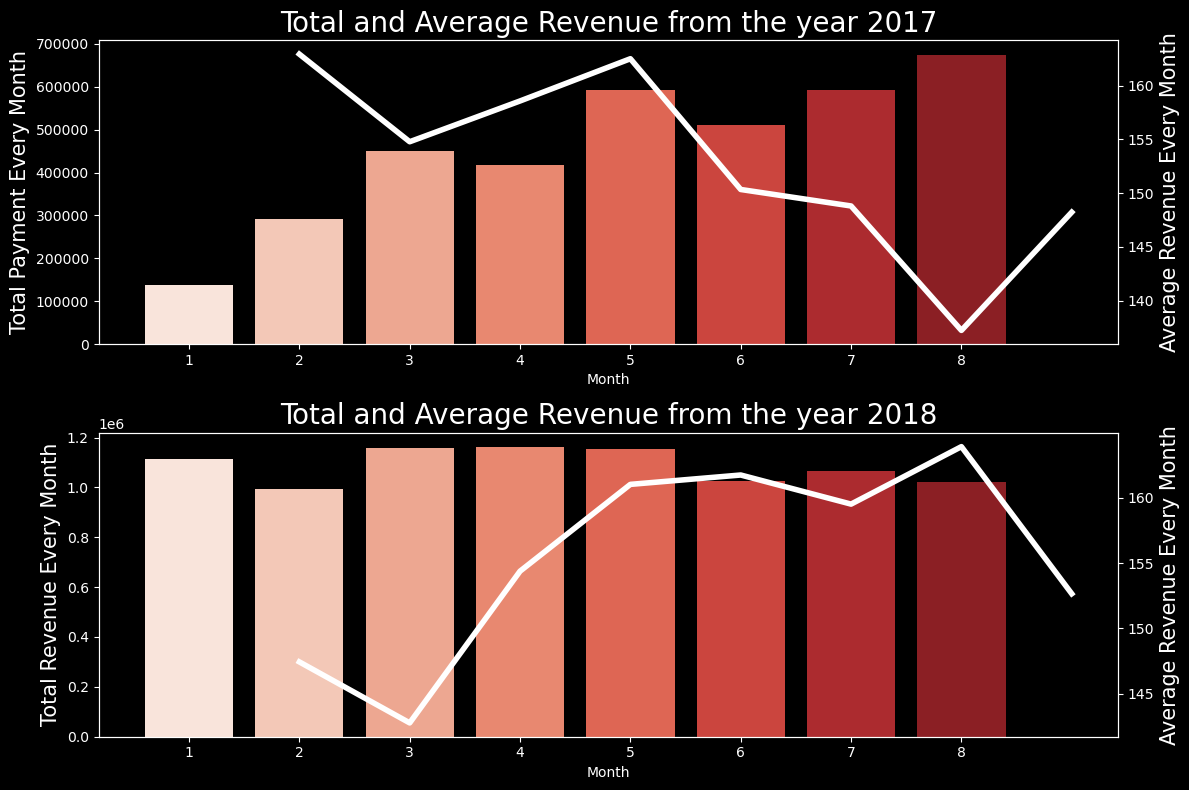

In [41]:
plt.figure(figsize=(12,8))

# First subplot for the year 2017
plt.subplot(2, 1, 1)
monthly_payment1 = monthly_payment[monthly_payment['year'] == 2017]

ax1 = sns.barplot(x=monthly_payment1['month'], y=monthly_payment1['payment_value'], palette='Reds')
ax1.set_ylabel('Total Payment Every Month', color='white',fontsize=15)
ax1.tick_params(axis='y', labelcolor='white')

# Create a second y-axis for the lineplot
ax2 = ax1.twinx()
sns.lineplot(x=monthly_payment1['month'], y=monthly_payment1['average_payment_value'], linewidth=4, color='white', ax=ax2)
ax2.set_ylabel('Average Revenue Every Month', color='white',fontsize=15)
ax2.tick_params(axis='y', labelcolor='white')

# Set title and labels
ax1.set_xlabel('Month')
ax1.set_title('Total and Average Revenue from the year 2017',fontsize=20)

# Second subplot for the year 2018
plt.subplot(2, 1, 2)
monthly_payment2 = monthly_payment[monthly_payment['year'] == 2018]

ax3 = sns.barplot(x=monthly_payment2['month'], y=monthly_payment2['payment_value'], palette='Reds')
ax3.set_ylabel('Total Revenue Every Month', color='white',fontsize=15)
ax3.tick_params(axis='y', labelcolor='white')

# Create a second y-axis for the lineplot
ax4 = ax3.twinx()
sns.lineplot(x=monthly_payment2['month'], y=monthly_payment2['average_payment_value'], linewidth=4, color='white', ax=ax4)
ax4.set_ylabel('Average Revenue Every Month', color='white',fontsize=15)
ax4.tick_params(axis='y', labelcolor='white')

# Set title and labels
ax3.set_xlabel('Month')
ax3.set_title('Total and Average Revenue from the year 2018',fontsize=20)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### `INSIGHTS:`

- August consistently has high payment values in both years, showing a recurring peak.
- Both 2017 and 2018 show higher payment values around the middle of the year, particularly from May to August.
- Average payment values peak in August for both years.
- Higher average payment values are seen from May to August in both years.
- Average payment values are generally lower in the early months of the year.
- From March to May in both 2017 and 2018, there is a noticeable upward trend in average payment values, reflecting an increase in payments during this period each year.
- In 2017, the average revenue was at its lowest in August, whereas in 2018, August saw the highest average revenue.

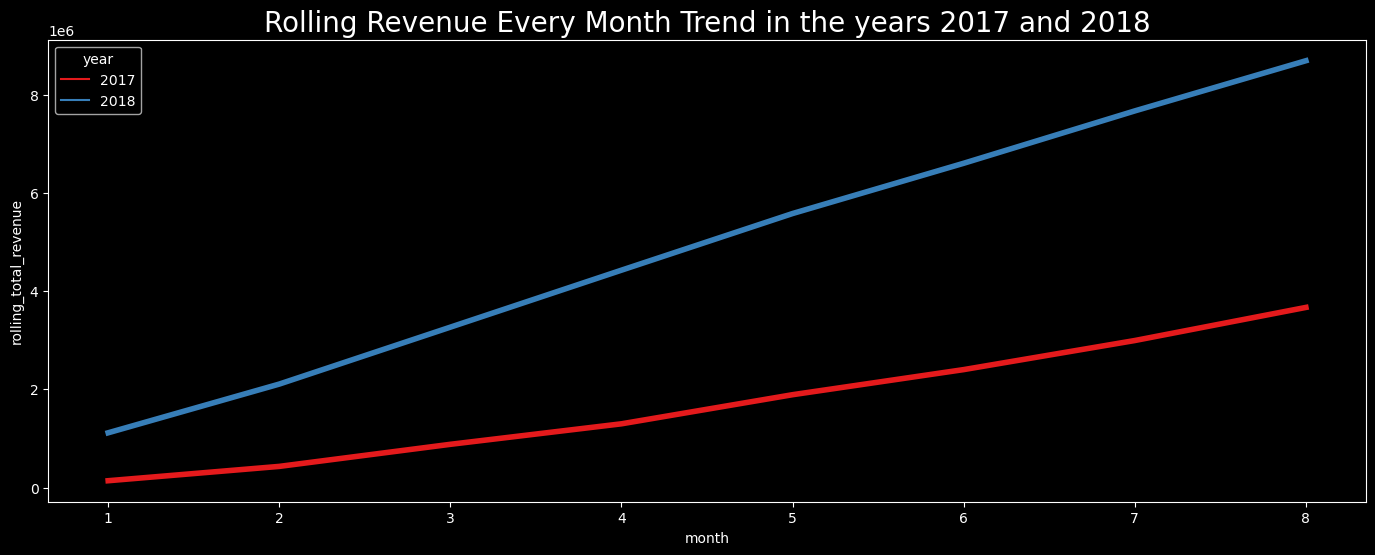

In [42]:
plt.figure(figsize=(17,6))
sns.lineplot(x=monthly_payment['month'], y=monthly_payment['rolling_total_revenue'],hue=monthly_payment['year'],linewidth=4,palette='Set1')
plt.title('Rolling Revenue Every Month Trend in the years 2017 and 2018',fontsize=20)
plt.show()

In [43]:
query16 = """
SELECT
    YEAR(o.order_purchase_timestamp) AS 'year',
    MONTH(o.order_purchase_timestamp) AS 'month',
    COUNT(o.order_id) AS 'total_orders',
    (COUNT(o.order_id) / (COUNT(DISTINCT YEAR(o.order_purchase_timestamp)) * 12)) AS 'average_orders',
    SUM(COUNT(o.order_id)) OVER (PARTITION BY YEAR(o.order_purchase_timestamp)
        ORDER BY YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS rolling_total_orders
FROM target.orders AS o
WHERE (YEAR(o.order_purchase_timestamp) > 2016) AND (MONTH(o.order_purchase_timestamp) BETWEEN 1 AND 8)
GROUP BY 1, 2
ORDER BY 1, 2;

"""

cur.execute(query16)
monthly_orders = pd.read_sql_query(query16, data_base)
monthly_orders

year  month  total_orders  average_orders  rolling_total_orders
0   2017      1           800         66.6667                 800.0
1   2017      2          1780        148.3333                2580.0
2   2017      3          2682        223.5000                5262.0
3   2017      4          2404        200.3333                7666.0
4   2017      5          3700        308.3333               11366.0
5   2017      6          3245        270.4167               14611.0
6   2017      7          4026        335.5000               18637.0
7   2017      8          4331        360.9167               22968.0
8   2018      1          7269        605.7500                7269.0
9   2018      2          6728        560.6667               13997.0
10  2018      3          7211        600.9167               21208.0
11  2018      4          6939        578.2500               28147.0
12  2018      5          6873        572.7500               35020.0
13  2018      6          6167        513.9167               41187.0
14  2018      7          6292        524.3333               47479.0
15  2018      8          6512        542.6667               53991.0

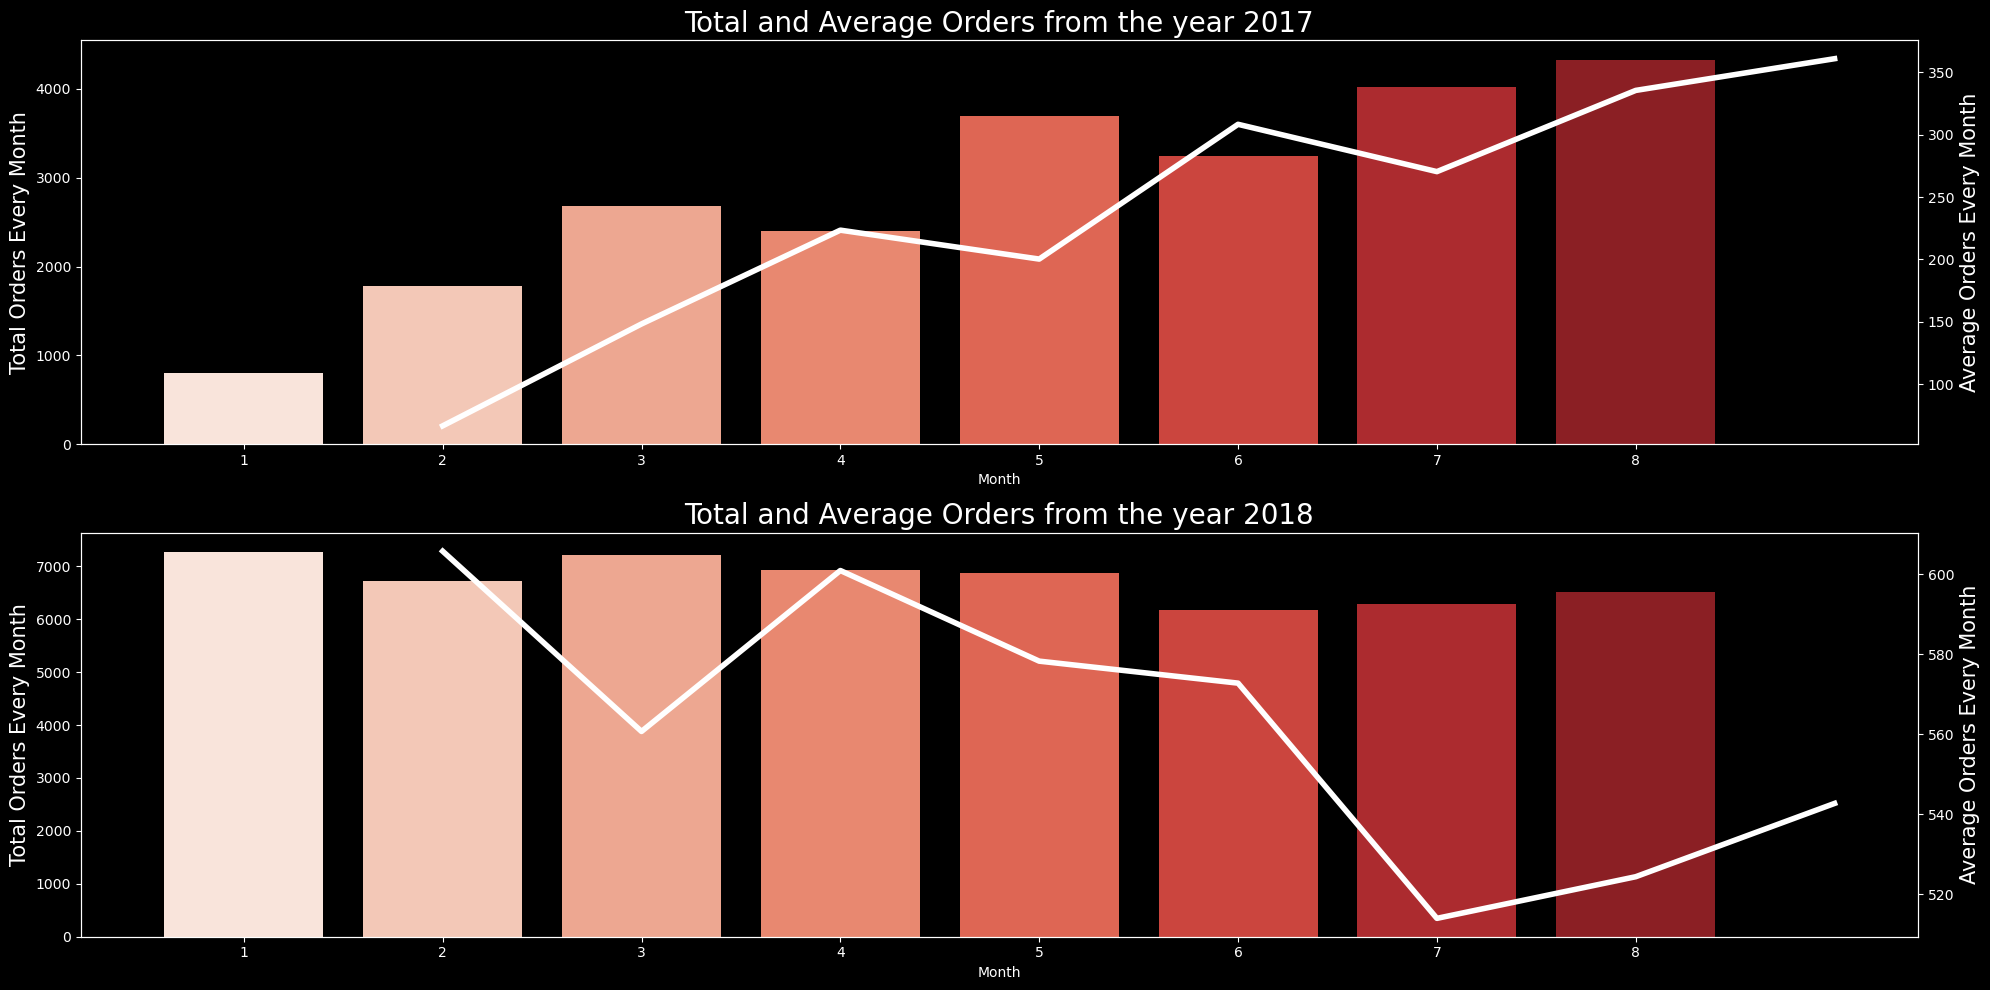

In [44]:
plt.figure(figsize=(20,10))

# First subplot for the year 2017
plt.subplot(2, 1, 1)
monthly_orders1 = monthly_orders[monthly_orders['year'] == 2017]

ax1 = sns.barplot(x=monthly_orders1['month'], y=monthly_orders1['total_orders'], palette='Reds')
ax1.set_ylabel('Total Orders Every Month', color='white',fontsize=15)
ax1.tick_params(axis='y', labelcolor='white')

# Create a second y-axis for the lineplot
ax2 = ax1.twinx()
sns.lineplot(x=monthly_orders1['month'], y=monthly_orders1['average_orders'], linewidth=4, color='white', ax=ax2)
ax2.set_ylabel('Average Orders Every Month', color='white',fontsize=15)
ax2.tick_params(axis='y', labelcolor='white')

# Set title and labels
ax1.set_xlabel('Month')
ax1.set_title('Total and Average Orders from the year 2017',fontsize=20)

# Second subplot for the year 2018
plt.subplot(2, 1, 2)
monthly_orders2 = monthly_orders[monthly_orders['year'] == 2018]

ax3 = sns.barplot(x=monthly_orders2['month'], y=monthly_orders2['total_orders'], palette='Reds')
ax3.set_ylabel('Total Orders Every Month', color='white',fontsize=15)
ax3.tick_params(axis='y', labelcolor='white')

# Create a second y-axis for the lineplot
ax4 = ax3.twinx()
sns.lineplot(x=monthly_orders2['month'], y=monthly_orders2['average_orders'], linewidth=4, color='white', ax=ax4)
ax4.set_ylabel('Average Orders Every Month', color='white',fontsize=15)
ax4.tick_params(axis='y', labelcolor='white')

# Set title and labels
ax3.set_xlabel('Month')
ax3.set_title('Total and Average Orders from the year 2018',fontsize=20)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### `INSIGHTS`:

-  In 2017, the average orders was at its lowest in February, whereas in 2018, August saw the highest average orders.
- Average orders are highest in August for both years.
- From March to May, there is a noticeable upward trend in average orders.
- The lowest average orders occur in January for both years.
- The orders growth for the year 2017 can be called Gradual Upward Trend and for 2018 it can be Steady Increase.
- Total and average orders both peak in August each year, indicating a consistent high in this month across the years.
- From March to May, there is an upward trend in both total and average orders, showing a significant increase in these months.
- In January, total orders are low, and average orders also reflect a relatively low value, indicating a common dip at the start of the year.

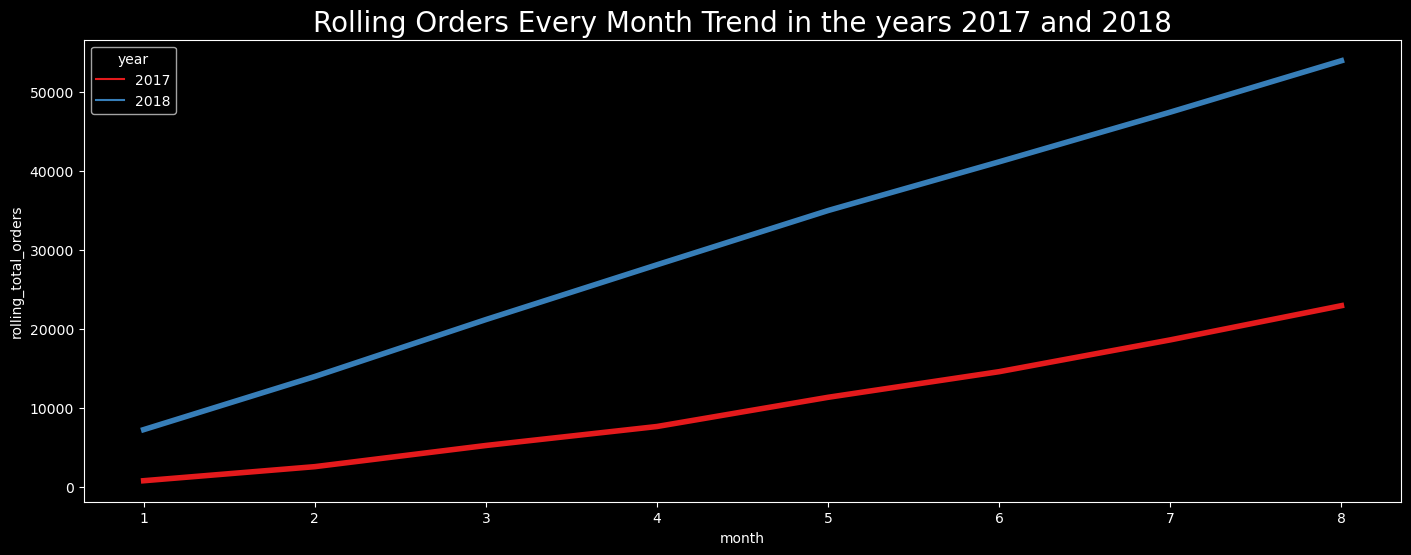

In [45]:
plt.figure(figsize=(17,6))
sns.lineplot(x=monthly_orders['month'], y=monthly_orders['rolling_total_orders'],hue=monthly_payment['year'],linewidth=4,palette='Set1')
plt.title('Rolling Orders Every Month Trend in the years 2017 and 2018',fontsize=20)
plt.show()

In [46]:
query17 = """SELECT 
    YEAR(o.order_purchase_timestamp) AS 'year',
    MONTH(o.order_purchase_timestamp) AS 'month',
    COUNT(c.customer_id) AS 'total_customers',
    (COUNT(c.customer_id) / 
     (DATEDIFF(MAX(o.order_purchase_timestamp), MIN(o.order_purchase_timestamp)) + 1) * 30) AS 'average_customers',
    SUM(COUNT(c.customer_id)) OVER (PARTITION BY YEAR(o.order_purchase_timestamp)
        ORDER BY YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS 'rolling_total_customers'
FROM 
    target.customers AS c
INNER JOIN 
    orders AS o
ON 
    o.customer_id = c.customer_id
WHERE 
    YEAR(o.order_purchase_timestamp) > 2016 
    AND MONTH(o.order_purchase_timestamp) BETWEEN 1 AND 8
GROUP BY 
    YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp)
ORDER BY 
    YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp);

"""
cur.execute(query17)
timewise_customers = pd.read_sql_query(query17, data_base)
timewise_customers

year  month  total_customers  average_customers  rolling_total_customers
0   2017      1              800           888.8889                    800.0
1   2017      2             1780          1907.1429                   2580.0
2   2017      3             2682          2595.4839                   5262.0
3   2017      4             2404          2404.0000                   7666.0
4   2017      5             3700          3580.6452                  11366.0
5   2017      6             3245          3245.0000                  14611.0
6   2017      7             4026          3896.1290                  18637.0
7   2017      8             4331          4191.2903                  22968.0
8   2018      1             7269          7034.5161                   7269.0
9   2018      2             6728          7208.5714                  13997.0
10  2018      3             7211          6978.3871                  21208.0
11  2018      4             6939          6939.0000                  28147.0
12  2018      5             6873          6651.2903                  35020.0
13  2018      6             6167          6167.0000                  41187.0
14  2018      7             6292          6089.0323                  47479.0
15  2018      8             6512          6301.9355                  53991.0

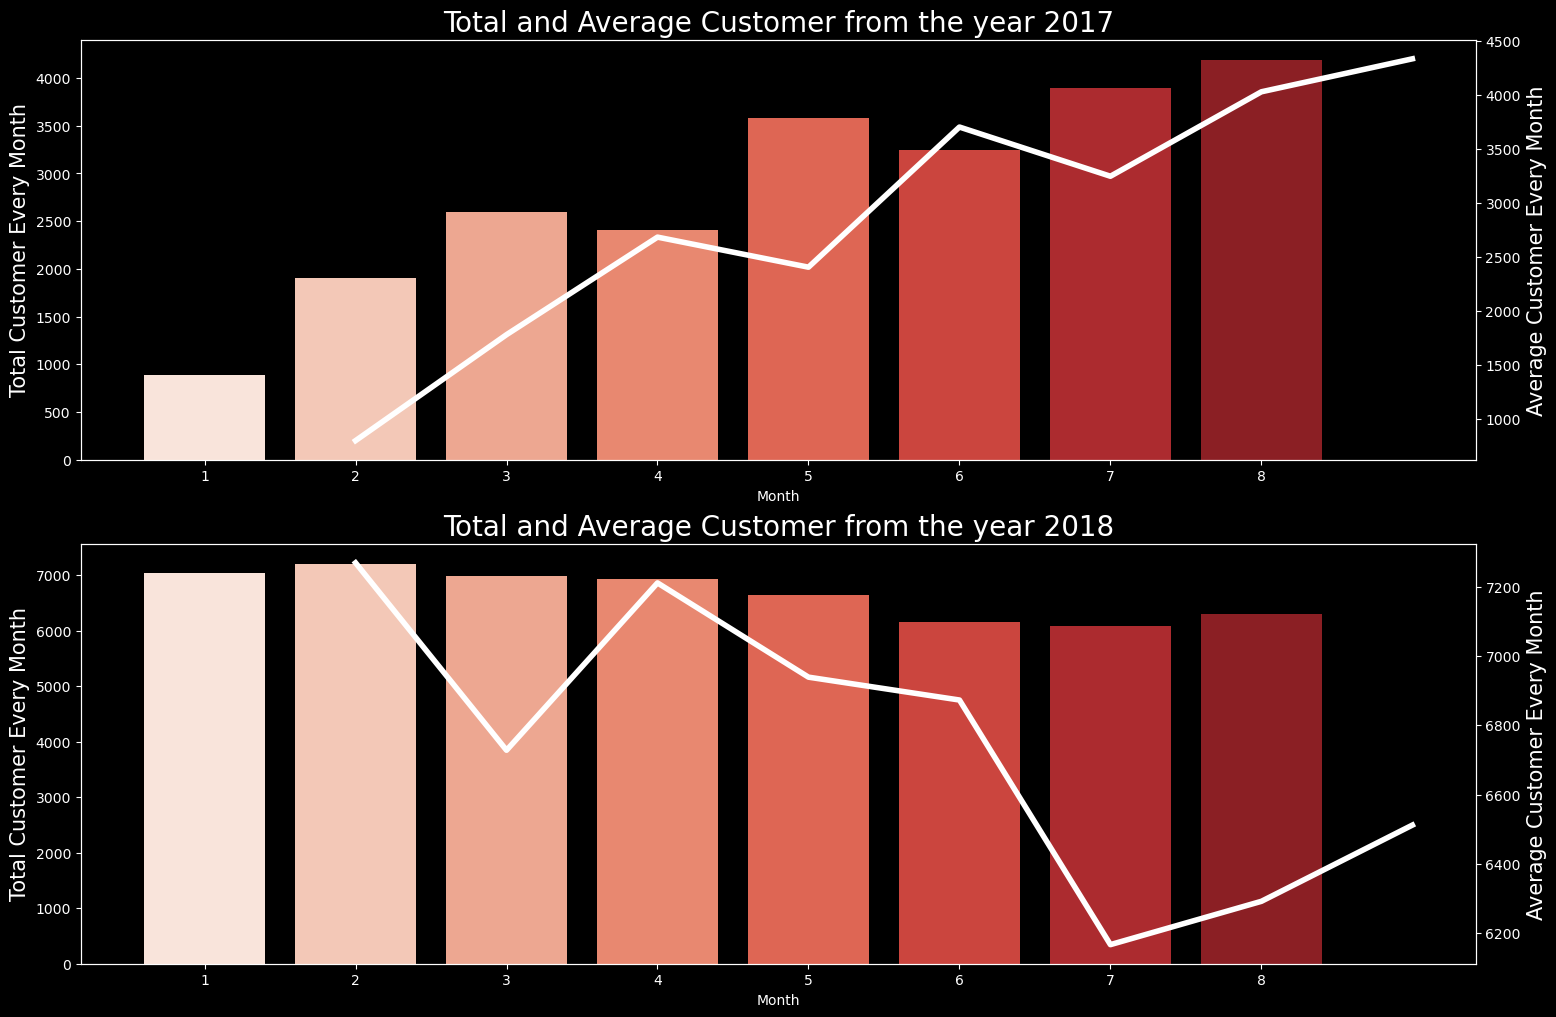

In [47]:
plt.figure(figsize=(18,12))
plt.subplot(2, 1, 1)
timewise_customers1 = timewise_customers[timewise_customers['year'] == 2017]
ax1 = sns.barplot(x=timewise_customers1['month'],y=timewise_customers1['average_customers'],linewidth=4,palette='Reds')
ax1.set_ylabel('Total Customer Every Month', color='white',fontsize=15)
ax1.tick_params(axis='y', labelcolor='white')

# Create a second y-axis for the lineplot
ax2 = ax1.twinx()
sns.lineplot(x=timewise_customers1['month'],y=timewise_customers1['total_customers'],linewidth=4,color='white')
ax2.set_ylabel('Average Customer Every Month', color='white',fontsize=15)
ax2.tick_params(axis='y', labelcolor='white')

# Set title and labels
ax1.set_xlabel('Month')
ax1.set_title('Total and Average Customer from the year 2017',fontsize=20)

plt.subplot(2, 1, 2)

timewise_customers2 = timewise_customers[timewise_customers['year'] == 2018]
ax1 = sns.barplot(x=timewise_customers2['month'],y=timewise_customers2['average_customers'],linewidth=4,palette='Reds')
ax1.set_ylabel('Total Customer Every Month', color='white',fontsize=15)
ax1.tick_params(axis='y', labelcolor='white')

# Create a second y-axis for the lineplot
ax2 = ax1.twinx()
sns.lineplot(x=timewise_customers2['month'],y=timewise_customers2['total_customers'],linewidth=4,color='white')
ax2.set_ylabel('Average Customer Every Month', color='white',fontsize=15)
ax2.tick_params(axis='y', labelcolor='white')

# Set title and labels
ax1.set_xlabel('Month')
ax1.set_title('Total and Average Customer from the year 2018',fontsize=20)
plt.show()

### `INSIGHTS:`

- Both 2017 and 2018 see a peak in total customers in August, indicating a significant increase in this month each year.
- There is a consistent upward trend from January to August, with total customers generally increasing as the year progresses.
- The lowest total number of customers is observed in January for both years, suggesting a slow start to the year.
- From March to May, total customers show a notable increase, reflecting a period of growth before the summer peak.
- After reaching a peak in August, total customers decline slightly in the following months.
- Average customers peak in August for both 2017 and 2018, showing a consistent high in this month.
- From March to May, average customers increase, indicating a period of rising values leading up to summer.
- January has the lowest average customers, suggesting a slow start to the year.
- There is a general upward trend from January to August, with average customers rising as the year progresses.
- After August, average customers tend to decrease slightly. 

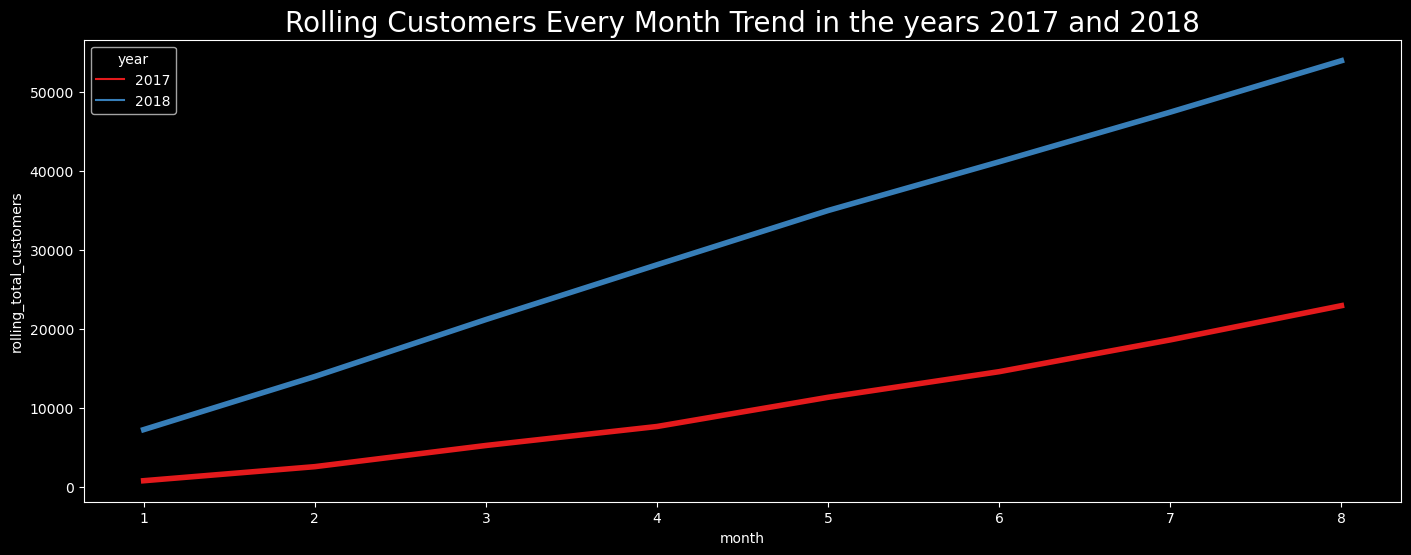

In [48]:
plt.figure(figsize=(17,6))
sns.lineplot(x=timewise_customers['month'], y=timewise_customers['rolling_total_customers'],hue=timewise_customers['year'],linewidth=4,palette='Set1')
plt.title('Rolling Customers Every Month Trend in the years 2017 and 2018',fontsize=20)
plt.show()

### `INSIGHTS:`

- AL has the highest average revenue at 216.73, showing the highest spend per customer.
- SP has the highest total revenue at 5,921,678.12, indicating the largest aggregate revenue.
- PA and PI have high average revenues (201.53 and 199.51) but relatively lower total revenues.
- BA and MG show high total revenues but lower average revenues compared to other states.
- AC and RR have high average revenues but low total revenues, suggesting fewer but high-value transactions.

### `OTHER OBSERVATIONS:`

- States with the highest average revenue, such as AL, PA, and PI, generally have lower total revenues, indicating that while individual transactions are high, the number of transactions may be fewer.
- States with the highest total revenue, like SP, BA, and MG, have lower average revenues, suggesting a larger volume of transactions at a lower average spend per transaction.
- There is a trend where states with very high average revenues often have lower total revenues, while states with lower average revenues often generate higher total revenues.

In [52]:
query18 ="""SELECT c.customer_state,
    YEAR(order_approved_at) as 'year',
    MONTH(order_approved_at) as 'month',
    TIMESTAMPDIFF(HOUR, order_purchase_timestamp, order_approved_at) as 'purchase_to_approve',
    TIMESTAMPDIFF(HOUR,  order_purchase_timestamp,order_delivered_customer_date) as 'purchase_to_deliver',
    TIMESTAMPDIFF(HOUR, order_purchase_timestamp,order_estimated_delivery_date) as 'purchase_to_estimated',
    TIMESTAMPDIFF(HOUR, order_delivered_customer_date, order_estimated_delivery_date) as 'deliver_to_estimate'
FROM orders as o
INNER JOIN customers as c 
ON c.customer_id = o.customer_id
WHERE YEAR(o.order_approved_at) > 2016 and MONTH(o.order_approved_at) BETWEEN 1 and 8 and (o.order_status = 'delivered')
ORDER BY 1,2,3
"""
cur.execute(query18)
time_data = pd.read_sql_query(query18,data_base)


In [53]:
time_data.head(5)

customer_state  year  month  purchase_to_approve  purchase_to_deliver  \
0             AC  2017      1                    0                548.0   
1             AC  2017      1                    0                451.0   
2             AC  2017      2                    3                478.0   
3             AC  2017      2                    0                654.0   
4             AC  2017      2                    0                720.0   

   purchase_to_estimated  deliver_to_estimate  
0                   1060                512.0  
1                   1252                800.0  
2                    729                251.0  
3                    994                340.0  
4                    970                249.0

In [55]:
time_data.describe()

year         month  purchase_to_approve  purchase_to_deliver  \
count  74761.000000  74761.000000         74761.000000         74754.000000   
mean    2017.706786      4.700673             9.846605           291.135310   
std        0.455239      2.263033            20.278629           227.032545   
min     2017.000000      1.000000             0.000000            12.000000   
25%     2017.000000      3.000000             0.000000           152.000000   
50%     2018.000000      5.000000             0.000000           237.000000   
75%     2018.000000      7.000000            14.000000           362.000000   
max     2018.000000      8.000000           741.000000          5031.000000   

       purchase_to_estimated  deliver_to_estimate  
count           74761.000000         74754.000000  
mean              565.037038           273.488696  
std               215.216664           246.092373  
min                48.000000         -4535.000000  
25%               432.000000           154.000000  
50%               555.000000           290.000000  
75%               682.000000           394.000000  
max              3723.000000          3504.000000

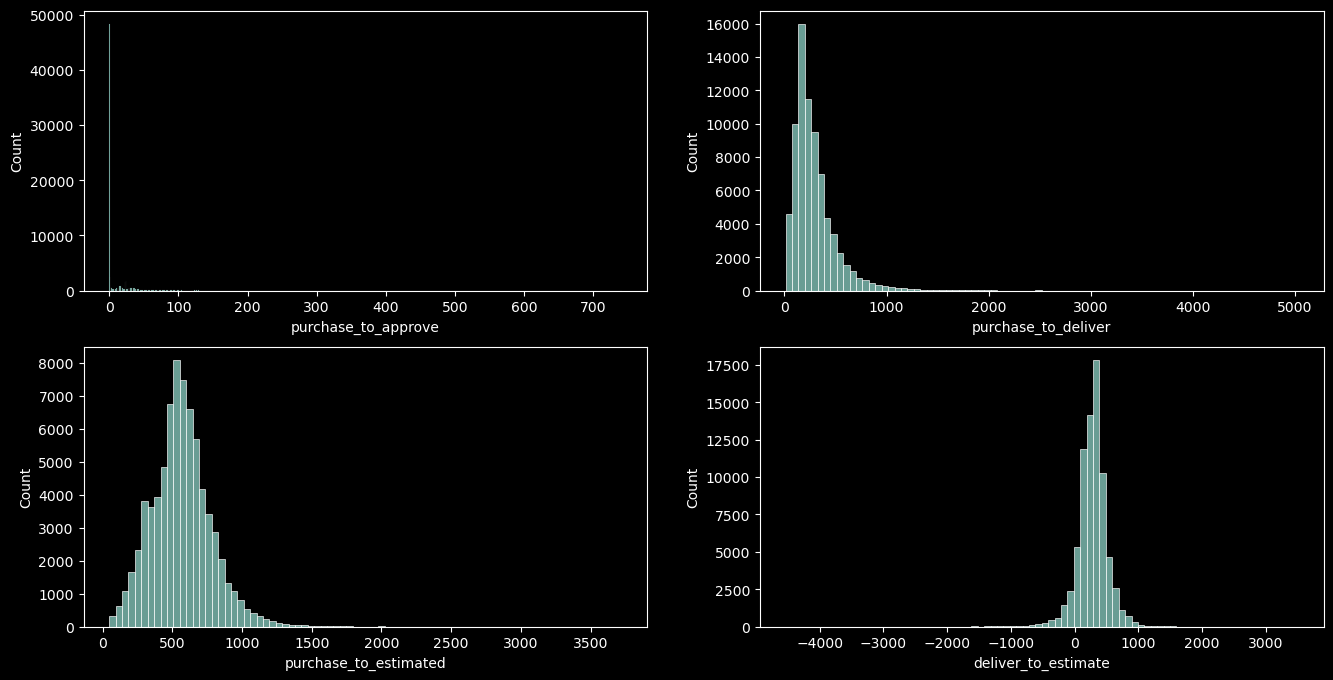

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(x=time_data['purchase_to_approve'])
plt.subplot(2,2,2)
sns.histplot(x=time_data['purchase_to_deliver'],bins=80)
plt.subplot(2,2,3)
sns.histplot(x=time_data['purchase_to_estimated'],bins=80)
plt.subplot(2,2,4)
sns.histplot(x=time_data['deliver_to_estimate'],bins=80)
plt.show()

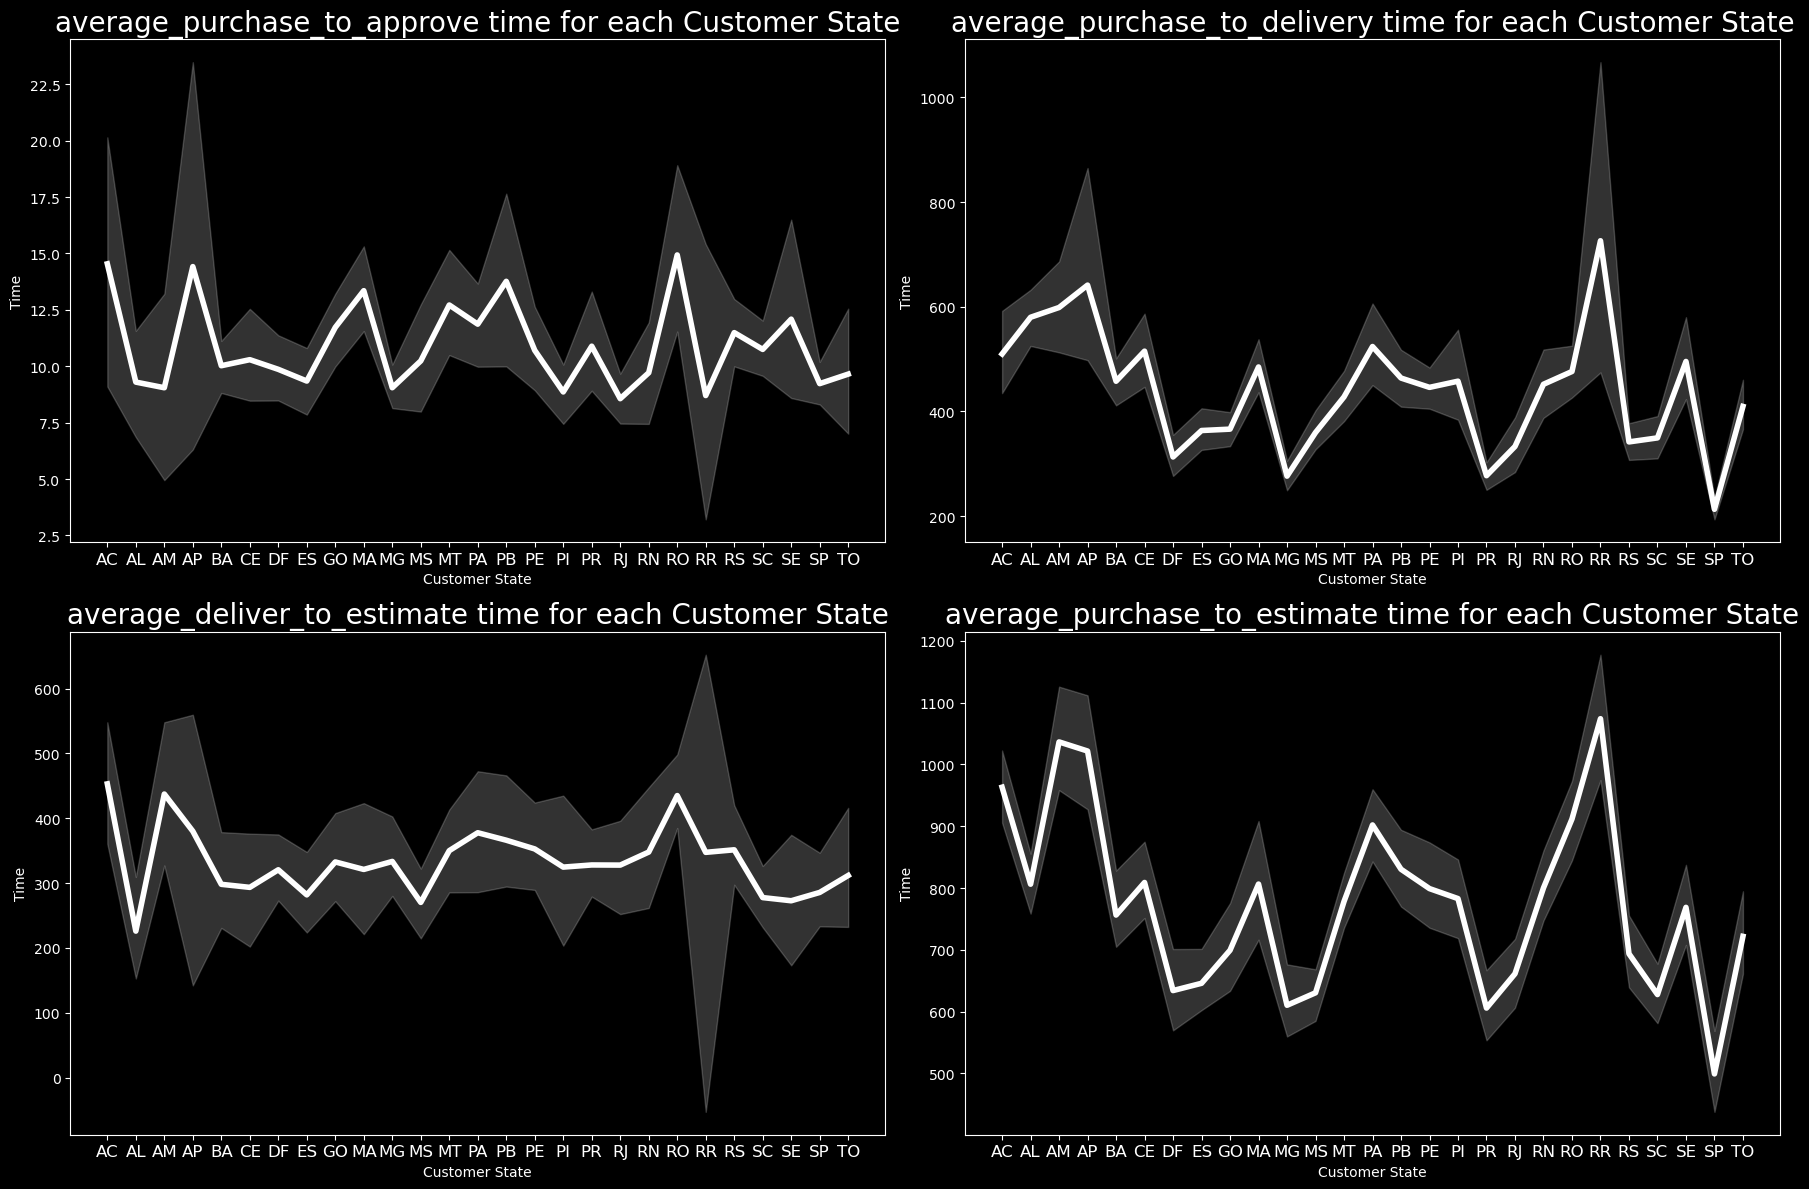

In [57]:
df_avg = time_data.groupby(['customer_state', 'year', 'month']).agg(
    average_purchase_to_approve=('purchase_to_approve', 'mean'),
    average_purchase_to_delivery=('purchase_to_deliver', 'mean'),
    average_purchase_to_estimate=('purchase_to_estimated', 'mean'),
    average_deliver_to_estimate=('deliver_to_estimate', 'mean')
).reset_index()

# Create a date column for plotting
df_avg['date'] = pd.to_datetime(df_avg['year'].astype(str) + '-' + df_avg['month'].astype(str))

df_avg.head()

cols = ['average_purchase_to_approve','average_purchase_to_delivery', 'average_deliver_to_estimate','average_purchase_to_estimate']
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.lineplot(x=df_avg['customer_state'], y=df_avg[col], color='white', linewidth=4, ax=axes[i])
    axes[i].set_title(f'{col} time for each Customer State', fontsize=20)
    axes[i].set_xlabel('Customer State')
    axes[i].set_ylabel('Time')
    axes[i].tick_params(axis='x', labelsize=12)
plt.tight_layout()
plt.show()

###  `INSIGHTS:`

- SP (São Paulo): Known for efficient logistics with the fastest delivery times. However, initial processing times are slower, indicating potential for improvement.

- MG (Minas Gerais): Quick in initial approval and delivery stages, but faces inefficiencies in final delivery estimation, pointing to potential bottlenecks.

- RS (Rio Grande do Sul): Consistent delivery times across stages, suggesting reliable logistics but not the fastest overall.

- RJ (Rio de Janeiro): Balances efficiency and consistency well, though there is still room to enhance speed.

- AM (Amazonas): Faces logistical challenges, particularly in final delivery estimation, indicating significant delays.

- RR (Roraima): Experiences substantial delays across all stages, reflecting major logistical inefficiencies.

- DF (Distrito Federal): Overall efficient with the shortest total delivery times, showing a streamlined process.

- CE (Ceará): Maintains consistent but relatively slower delivery times, indicating steady but not optimized logistics.

- PA (Pará): Shows delays at multiple stages, suggesting widespread logistical inefficiencies.

- AP (Amapá): Significant delays in the delivery stage, leading to high overall times and potential improvement areas.


- States with major urban centers (SP, RJ, DF) generally show faster and more efficient delivery times due to better logistics infrastructure.

- Geographical Challenges: Northern and remote states (AM, RR, AP) experience significant delays in delivery processes, indicating logistical challenges.

- Consistent States: States like RS and SC maintain consistent delivery times across all stages, suggesting reliable but not necessarily fast logistics.

- Approval Process: The initial purchase to approval time is relatively fast across most states, but there are notable delays in the final delivery estimation for several states.

- Delivery Bottlenecks: States like MG and CE have efficient initial stages but face delays in the final delivery estimation, indicating potential bottlenecks in the delivery process.

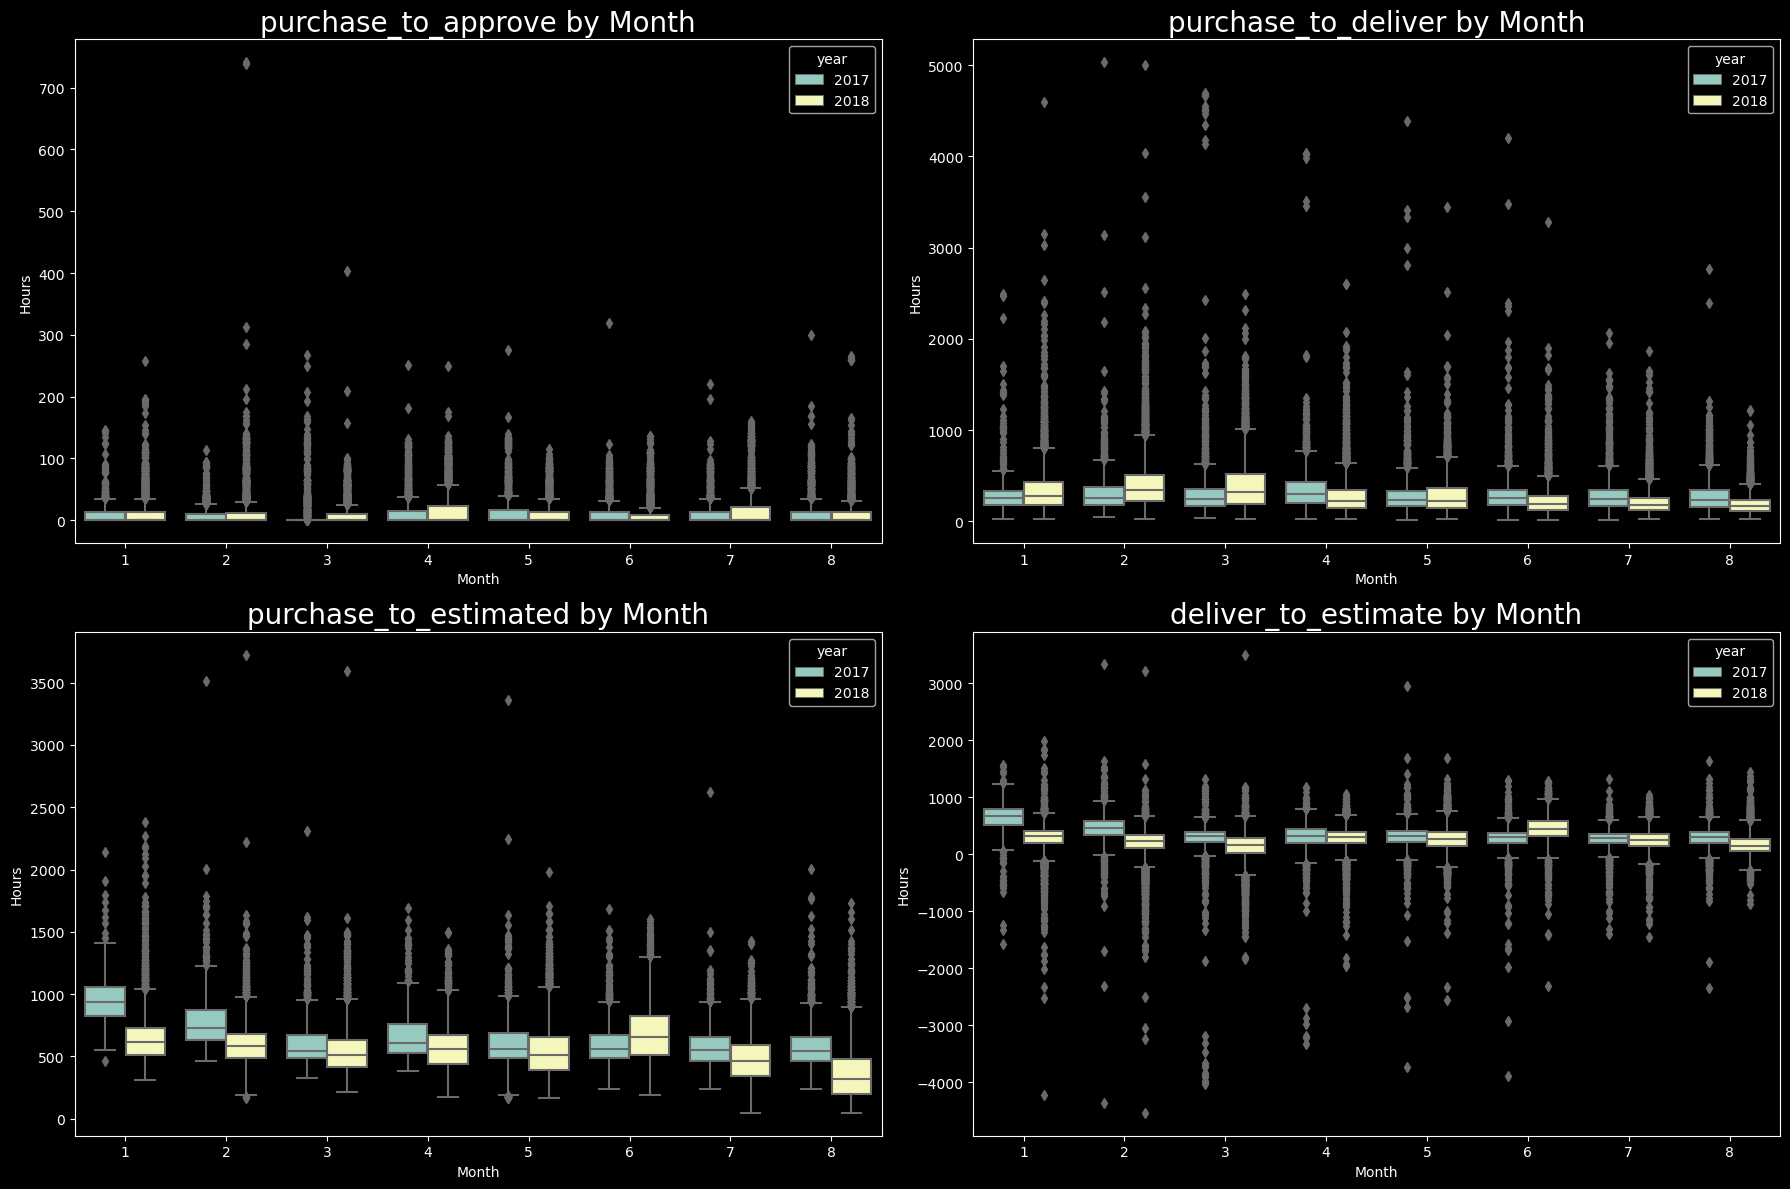

In [58]:
cols = ['purchase_to_approve', 'purchase_to_deliver', 'purchase_to_estimated', 'deliver_to_estimate']
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(x=time_data['month'], y=time_data[col], hue=time_data['year'], ax=axes[i])
    axes[i].set_title(f'{col} by Month', fontsize=20)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Hours')
plt.tight_layout()
plt.show()

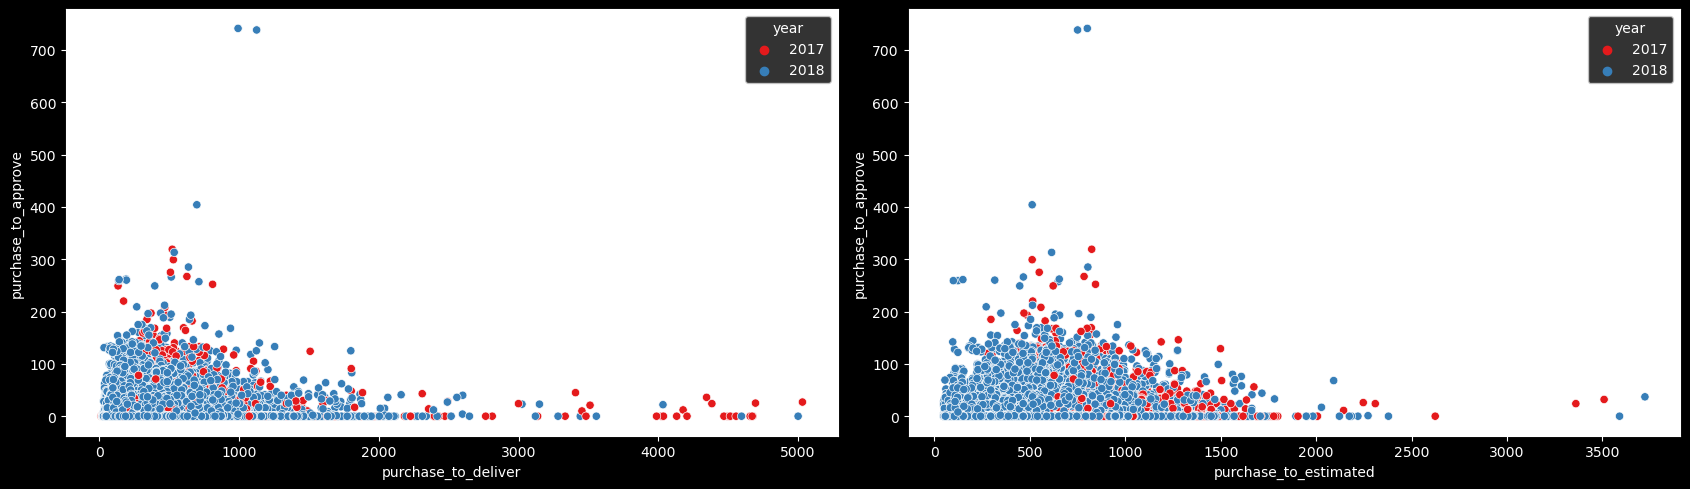

In [59]:
plt.figure(figsize=(17,5))

# Create subplots
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=time_data['purchase_to_deliver'], y=time_data['purchase_to_approve'], hue=time_data['year'], ax=ax1,palette='Set1')
ax1.set_facecolor('white') 

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(x=time_data['purchase_to_estimated'], y=time_data['purchase_to_approve'], hue=time_data['year'], ax=ax2,palette='Set1')
ax2.set_facecolor('white')  


plt.tight_layout()
plt.show()

### `INSIGHTS FOR 2017 DATA:`

- The mean purchase_to_deliver time peaks in April and drops in May, with a general downward trend from June to August.
- The mean purchase_to_estimated time is highest in January and shows a consistent decrease through February to March.
- February shows exceptionally high maximum values for both purchase_to_deliver and purchase_to_estimated compared to other months.
- The median values for deliver_to_estimate remain relatively stable across months, even though the mean shows more variation.
- There is a general trend of decreasing mean purchase_to_deliver times from the start to the end of the year.
- The gap between purchase_to_estimated and purchase_to_deliver shows variations throughout the year, with larger discrepancies in some months.

### `INSIGHTS FOR 2018 DATA:` 

- The maximum values for purchase_to_deliver and purchase_to_estimated are notably high in January and February.
- The peak maximum for purchase_to_deliver in January is 4595 hours, and for purchase_to_estimated, it’s 2379 hours.
- There is a general decreasing trend in the maximum values for purchase_to_deliver, purchase_to_estimated, and deliver_to_estimate from the first half to the second half of the year.
- The maximum values for deliver_to_estimate remain significant throughout the year, with notable peaks in February and March.
- March shows high maximums for purchase_to_estimated and deliver_to_estimate while
- April shows similar trends with high values for purchase_to_deliver and deliver_to_estimate.


### `Comparison Between both:`
- Both years exhibit high maximum values in January and February.
- Maximum values for purchase_to_deliver, purchase_to_estimated, and deliver_to_estimate generally decrease from early to late in the year in both years.
- February is consistently a month with extreme values for purchase_to_deliver and purchase_to_estimated in both years.
- Both years show improved operational efficiency over time, with decreasing mean and maximum values for delivery and estimation metrics as the year progresses.

In [114]:
query20=  """SELECT 
    product_category,
    COUNT(product_category) AS category_count,
    (COUNT(product_category) * 100.0 / SUM(COUNT(product_category)) OVER ()) AS percentage
FROM 
    target.products
GROUP BY 
    product_category
ORDER BY 
    category_count DESC"""

cur.execute(query20)
category= pd.read_sql_query(query20,data_base)
category.head(20)

product_category  category_count  percentage
0                    bed table bath            3029     9.19244
1                     sport leisure            2867     8.70080
2              Furniture Decoration            2657     8.06349
3                     HEALTH BEAUTY            2444     7.41707
4                        housewares            2335     7.08628
5                        automotive            1900     5.76614
6              computer accessories            1639     4.97405
7                              toys            1411     4.28212
8                   Watches present            1329     4.03326
9                         telephony            1134     3.44147
10                           babies             919     2.78899
11                        perfumery             868     2.63421
12                 stationary store             849     2.57655
13     Fashion Bags and Accessories             849     2.57655
14                       Cool Stuff             789     2.39446
15                     Garden tools             753     2.28521
16                         pet Shop             719     2.18203
17                                              610     1.85123
18                      electronics             517     1.56900
19  Construction Tools Construction             400     1.21392

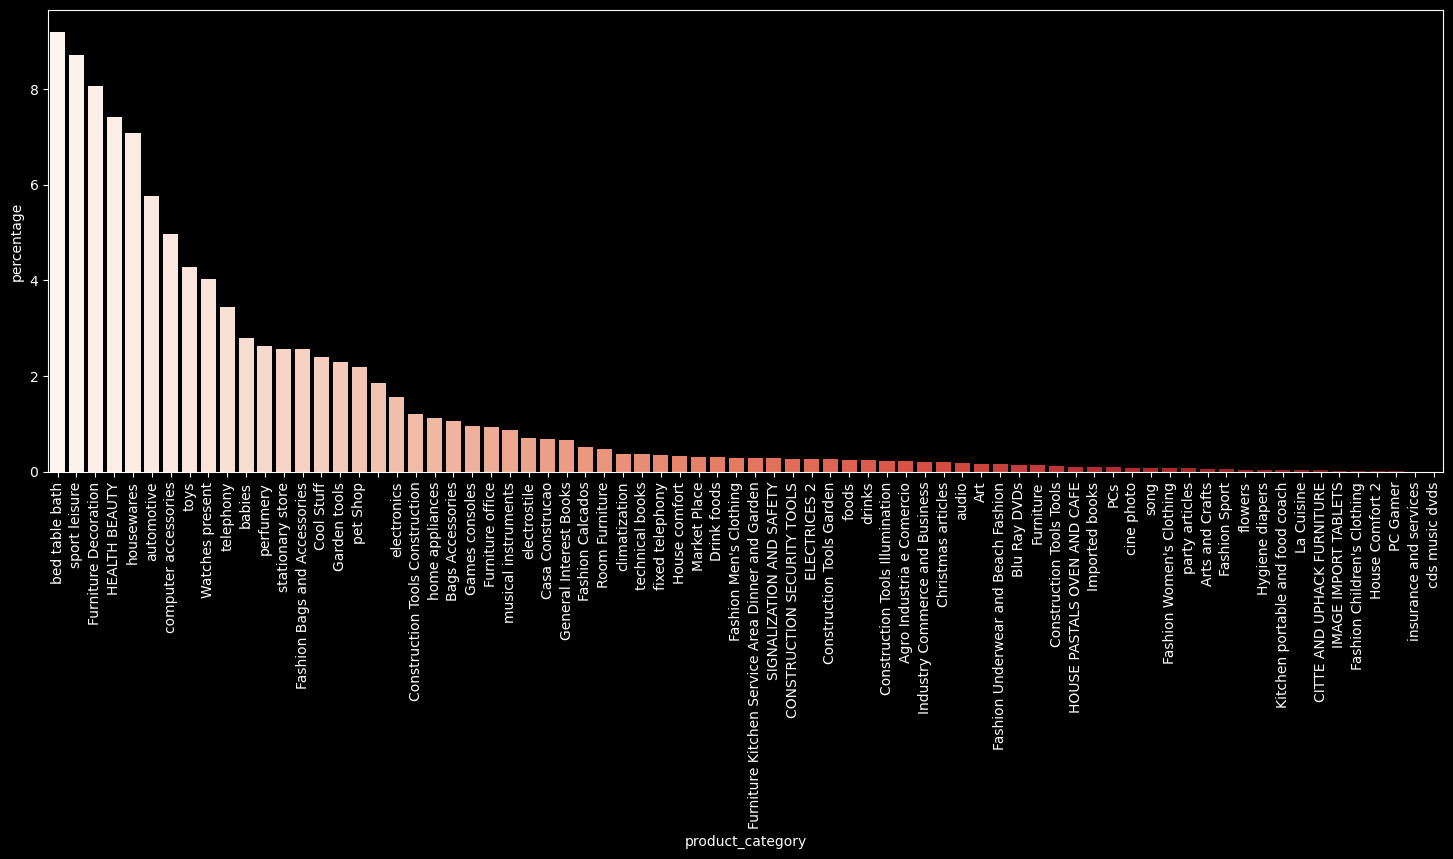

In [115]:
plt.figure(figsize=(18,6))
sns.barplot(x=category['product_category'],y=category['percentage'],palette='Reds')
plt.xticks(rotation = 90)
plt.show()

In [116]:
query21 = """WITH product_order_counts AS (
    SELECT
        s.seller_state,
        p.product_id,
        p.product_category,
        COUNT(o.order_id) AS order_count
    FROM
        target.orders o
    JOIN
        target.order_items as oi ON o.order_id = oi.order_id
    JOIN 
        target.products p ON oi.product_id = p.product_id
    JOIN
        target.sellers s ON oi.seller_id = s.seller_id
    GROUP BY
        s.seller_state,
        p.product_id,
        p.product_category
),
-- Find the maximum order count for each state
max_order_counts AS (
    SELECT
        seller_state,
        MAX(order_count) AS max_order_count
    FROM
        product_order_counts
    GROUP BY
        seller_state
)
-- Join the two CTEs to get the top products
SELECT
    poc.seller_state,
    poc.product_category,
    poc.order_count
FROM
    product_order_counts poc
JOIN
    max_order_counts moc
    ON poc.seller_state = moc.seller_state
    AND poc.order_count = moc.max_order_count
ORDER BY
    poc.order_count;
"""
cur.execute(query21)
top_products= pd.read_sql_query(query21,data_base)
top_products['state_product'] = top_products['seller_state'] + ' - ' + top_products['product_category']
top_products

seller_state      product_category  order_count              state_product
0            AC       technical books            1       AC - technical books
1            AM             telephony            1             AM - telephony
2            AM             telephony            1             AM - telephony
3            AM             telephony            1             AM - telephony
4            RO            automotive            2            RO - automotive
5            PA         sport leisure            2         PA - sport leisure
6            RO            automotive            2            RO - automotive
7            RO            automotive            2            RO - automotive
8            SE  computer accessories            3  SE - computer accessories
9            MS         HEALTH BEAUTY            4         MS - HEALTH BEAUTY
10           MS            Cool Stuff            4            MS - Cool Stuff
11           MS         HEALTH BEAUTY            4         MS - HEALTH BEAUTY
12           PB             telephony            5             PB - telephony
13           PI            automotive            7            PI - automotive
14           RN  Furniture Decoration           14  RN - Furniture Decoration
15           CE                 foods           17                 CE - foods
16           GO            housewares           42            GO - housewares
17           MT             perfumery           46             MT - perfumery
18           RS  computer accessories           49  RS - computer accessories
19           SC        bed table bath           70        SC - bed table bath
20           DF         HEALTH BEAUTY           87         DF - HEALTH BEAUTY
21           BA             telephony           93             BA - telephony
22           ES          Garden tools          113          ES - Garden tools
23           MA         HEALTH BEAUTY          156         MA - HEALTH BEAUTY
24           PR  computer accessories          171  PR - computer accessories
25           RJ       Watches present          226       RJ - Watches present
26           PE  computer accessories          274  PE - computer accessories
27           MG  computer accessories          343  MG - computer accessories
28           SP  Furniture Decoration          527  SP - Furniture Decoration

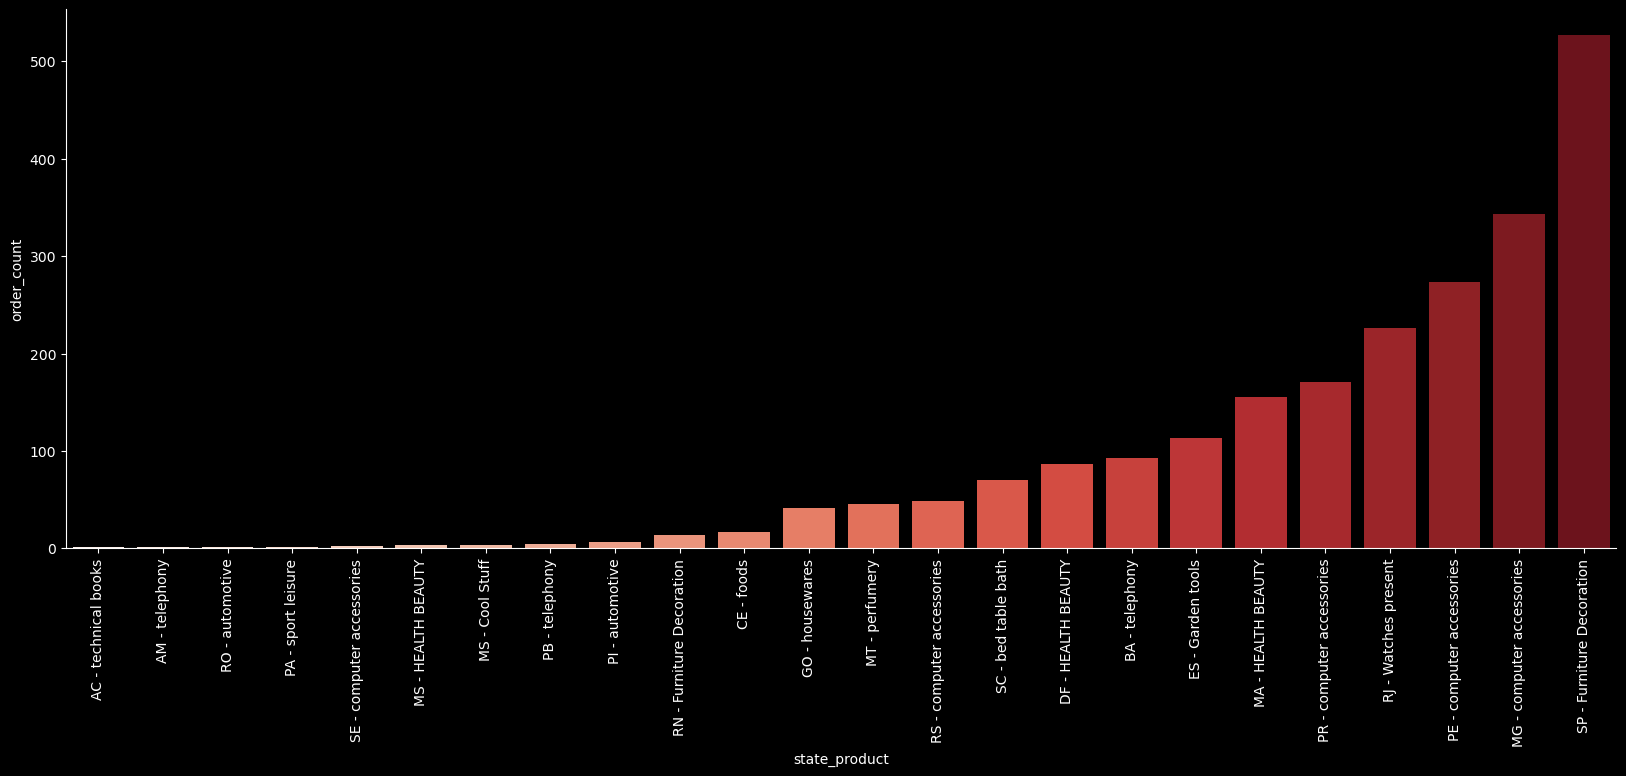

In [117]:
plt.figure(figsize=(20,7))
sns.barplot(x=top_products['state_product'],y=top_products['order_count'],palette='Reds')
plt.xticks(rotation = 90)
sns.despine()
plt.show()

In [118]:
query22 = """ select p.product_category,
count(oi.order_id) as 'total_orders',
sum(oi.price+oi.freight_value) as 'total_revenue'
from target.products as p
JOIN target.order_items as oi
ON oi.product_id = p.product_id
GROUP BY 1
"""
cur.execute(query22)
products_by_revenue= pd.read_sql_query(query22,data_base)
products_by_revenue.head()

product_category  total_orders  total_revenue
0            Cool Stuff          3796      719329.95
1              pet Shop          1947      253876.65
2  Furniture Decoration          8334      902511.79
3             perfumery          3419      453338.71
4          Garden tools          4347      584219.21

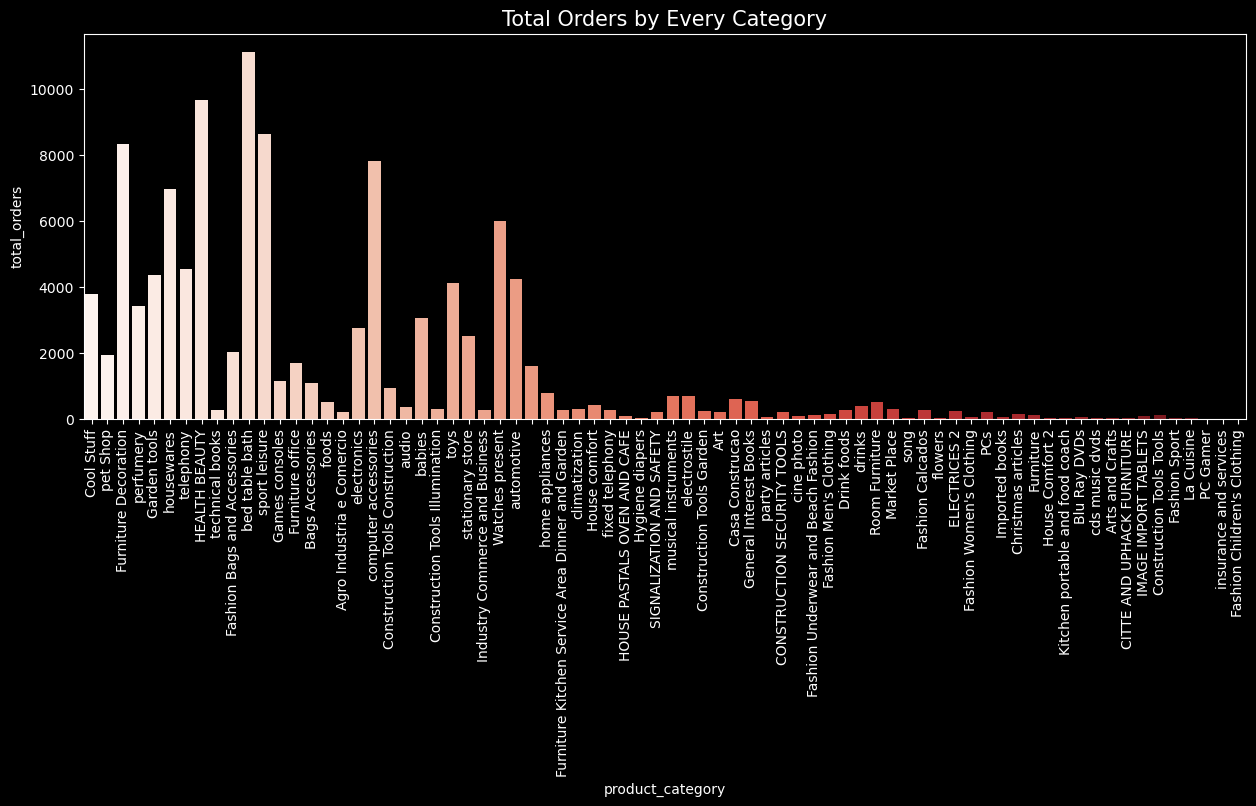

In [119]:
plt.figure(figsize=(15,5))

sns.barplot(x=products_by_revenue['product_category'],y=products_by_revenue['total_orders'],linewidth=4,palette='Reds')
plt.xticks(rotation=90)
plt.title('Total Orders by Every Category',fontsize=15)
plt.show()

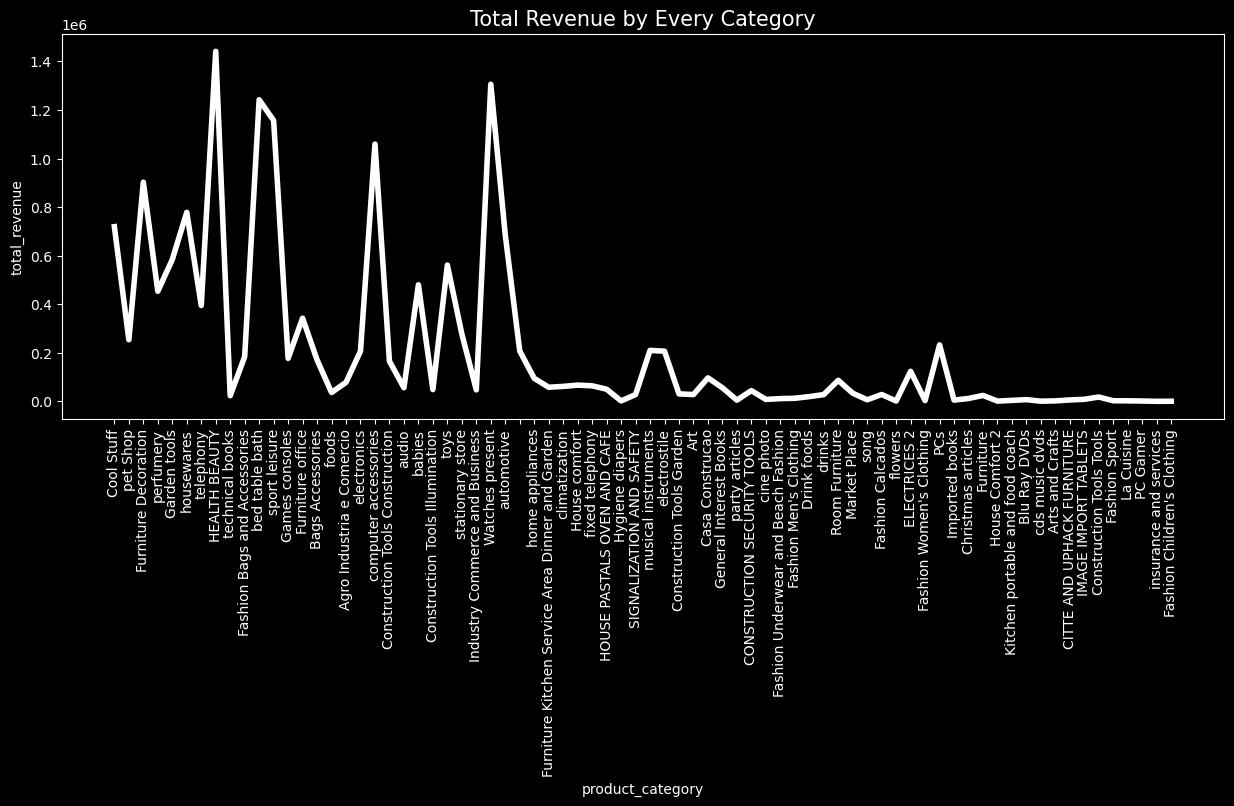

In [120]:
plt.figure(figsize=(15,5))
sns.lineplot(x=products_by_revenue['product_category'],y=products_by_revenue['total_revenue'],linewidth=4,color='white')
plt.title('Total Revenue by Every Category',fontsize=15)
plt.xticks(rotation=90)

plt.show()

In [121]:
query23 = """ select YEAR(o.order_purchase_timestamp) as 'year',
MONTH(o.order_purchase_timestamp) as 'month',
oi.price as 'price',
oi.freight_value as 'freight'
from target.orders as o
INNER JOIN order_items as oi
ON oi.order_id = o.order_id
where YEAR(o.order_purchase_timestamp) > 2016 and  MONTH(o.order_purchase_timestamp) BETWEEN 1 and 8 and (o.order_status = 'delivered')
order by YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp) 
"""
cur.execute(query23)
price_freight= pd.read_sql_query(query23,data_base)
price_freight.head()

year  month   price  freight
0  2017      1  498.99    18.60
1  2017      1   12.90    10.96
2  2017      1   44.99    15.11
3  2017      1   10.99    16.05
4  2017      1   84.80    18.00

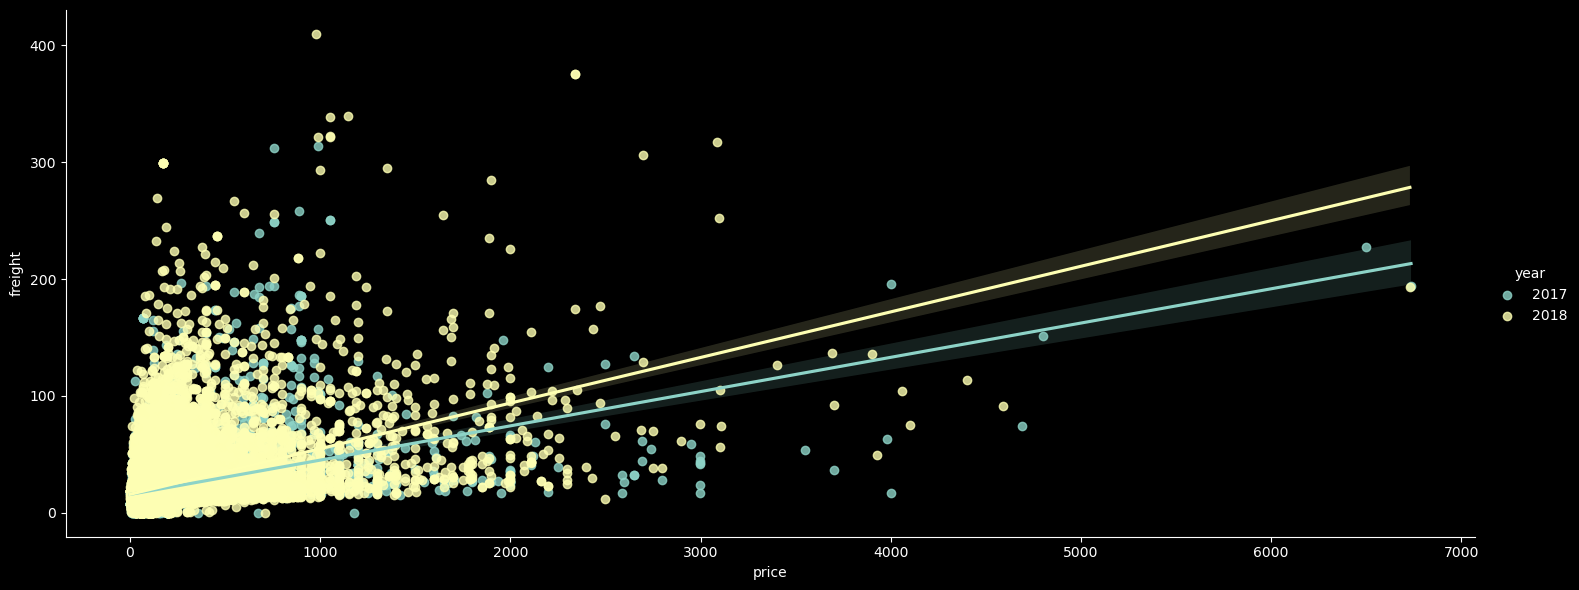

In [122]:
aspect_ratio = 15 / 6

# Create the lmplot with specified aspect ratio and height
sns.lmplot(x='price', 
           y='freight', 
           hue='year', 
           data=price_freight, 
           aspect=aspect_ratio, 
           height=6)
plt.show()

### `INSIGHTS:`

- There's a clear positive correlation between price and freight for both years. This indicates that as the price of a product increases, the freight cost tends to increase as well also trendlines suggest a roughly linear relationship between price and freight. However, the relationship is not perfectly linear, indicating other factors might influence freight costs.
- The trendline for 2018 appears to be steeper than that for 2017, suggesting that the relationship between price and freight might have strengthened or changed over time.
- The data points are scattered around the trendlines, indicating variability in freight costs for products with similar prices. This variability might be due to factors like product weight, dimensions, or shipping distance.

In [123]:
query23 = """ select *
from target.products as p
INNER JOIN target.order_items as oi
ON oi.product_id = p.product_id
"""
cur.execute(query23)
product_data = pd.read_sql_query(query23,data_base)
product_data .head()

product_id      product_category  \
0  4244733e06e7ecb4970a6e2683c13e61            Cool Stuff   
1  e5f2d52b802189ee658865ca93d83a8f              pet Shop   
2  c777355d18b72b67abbeef9df44fd0fd  Furniture Decoration   
3  7634da152a4610f1595efa32f14722fc             perfumery   
4  ac6c3623068f30de03045865e4e10089          Garden tools   

   product_name_length  product_description_length  product_photos_qty  \
0                   58                         598                   4   
1                   56                         239                   2   
2                   59                         695                   2   
3                   42                         480                   1   
4                   59                         409                   1   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0               650                 28                  9                14   
1             30000                 50                 30                40   
2              3050                 33                 13                33   
3               200                 16                 10                15   
4              3750                 35                 40                30   

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

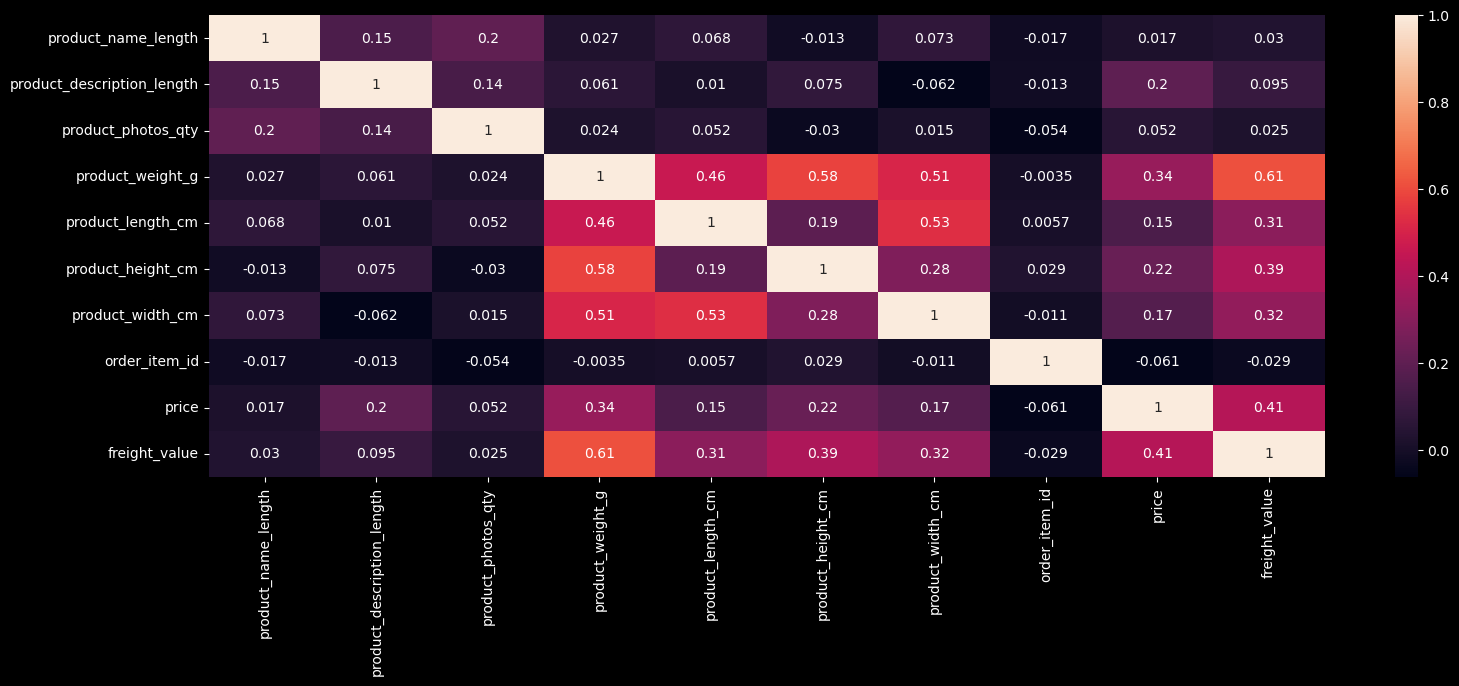

In [124]:
plt.figure(figsize=(18,6))
sns.heatmap(data=product_data .corr(),annot=True)
plt.show()

In [125]:
product_data.corr()

product_name_length  product_description_length  \
product_name_length                    1.000000                    0.149950   
product_description_length             0.149950                    1.000000   
product_photos_qty                     0.200714                    0.137124   
product_weight_g                       0.026908                    0.060826   
product_length_cm                      0.067996                    0.010425   
product_height_cm                     -0.013336                    0.074689   
product_width_cm                       0.072790                   -0.062320   
order_item_id                         -0.017261                   -0.013460   
price                                  0.017424                    0.195319   
freight_value                          0.029542                    0.095052   

                            product_photos_qty  product_weight_g  \
product_name_length                   0.200714          0.026908   
product_description_length            0.137124          0.060826   
product_photos_qty                    1.000000          0.024488   
product_weight_g                      0.024488          1.000000   
product_length_cm                     0.051532          0.460946   
product_height_cm                    -0.029551          0.583302   
product_width_cm                      0.015430          0.506616   
order_item_id                        -0.054272         -0.003538   
price                                 0.051682          0.338649   
freight_value                         0.024674          0.610424   

                            product_length_cm  product_height_cm  \
product_name_length                  0.067996          -0.013336   
product_description_length           0.010425           0.074689   
product_photos_qty                   0.051532          -0.029551   
product_weight_g                     0.460946           0.583302   
product_length_cm                    1.000000           0.193186   
product_height_cm                    0.193186           1.000000   
product_width_cm                     0.532810           0.281491   
order_item_id                        0.005663           0.029344   
price                                0.145676           0.223455   
freight_value                        0.309085           0.391837   

                            product_width_cm  order_item_id     price  \
product_name_length                 0.072790      -0.017261  0.017424   
product_description_length         -0.062320      -0.013460  0.195319   
product_photos_qty                  0.015430      -0.054272  0.051682   
product_weight_g                    0.506616      -0.003538  0.338649   
product_length_cm                   0.532810       0.005663  0.145676   
product_height_cm                   0.281491       0.029344  0.223455   
product_width_cm                    1.000000      -0.010690  0.172305   
order_item_id                      -0.010690       1.000000 -0.060522   
price                               0.172305      -0.060522  1.000000   
freight_value                       0.323767      -0.029380  0.414204   

                            freight_value  
product_name_length              0.029542  
product_description_length       0.095052  
product_photos_qty               0.024674  
product_weight_g                 0.610424  
product_length_cm                0.309085  
product_height_cm                0.391837  
product_width_cm                 0.323767  
order_item_id                   -0.029380  
price                            0.414204  
freight_value                    1.000000

### `INSIGHHTS:`

- Product Weight shows strong positive correlations with product_length_cm, product_height_cm, and product_width_cm. Heavier products tend to be larger in all dimensions.

- Product Dimensions (product_length_cm, product_height_cm, product_width_cm) are positively correlated with each other, indicating that larger products tend to have larger dimensions across all measures.

- Price is moderately positively correlated with product_weight_g and freight_value, suggesting that higher-priced items are often heavier and incur higher shipping costs.

- Freight Value has a strong positive correlation with product_weight_g and product_height_cm, indicating that shipping costs are higher for heavier and larger items.

- Product Name Length and Product Description Length have low correlations with other variables, suggesting minimal impact on price or shipping cost.